In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
#files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDataset/SentimentFul/'+file+'.csv')
    #price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [ ]:
def buildModel(l,n,d,le):
    opt=optimizers.Adam(lr=le)
    model = Sequential()  
    model.add(Dense(n, input_dim=151,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
           

Working on... AAPL
15.571701720841297
0.005338458253266777
working on d,u and l,learn 0.5 64 0.01 0.001


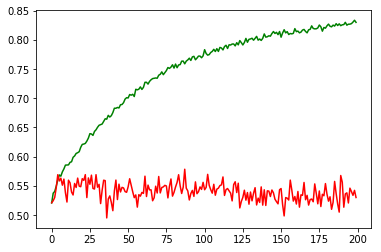

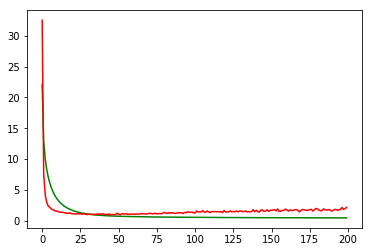

working on d,u and l,learn 0.5 64 0.01 0.0005


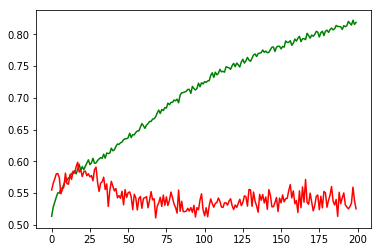

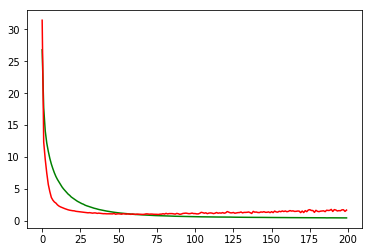

working on d,u and l,learn 0.5 64 0.01 0.0001


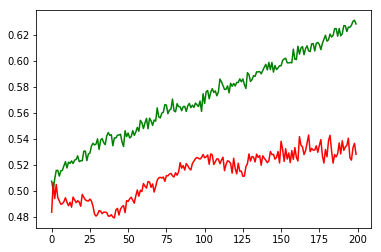

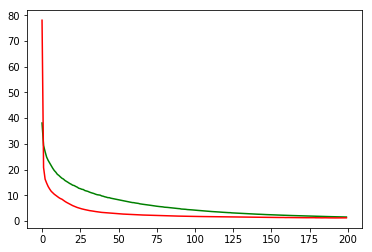

working on d,u and l,learn 0.5 128 0.01 0.001


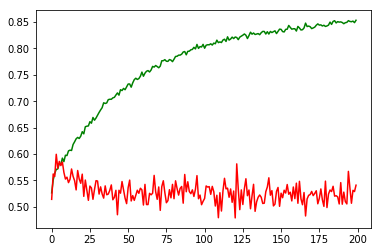

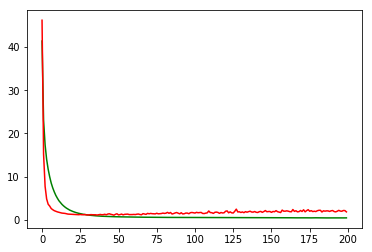

working on d,u and l,learn 0.5 128 0.01 0.0005


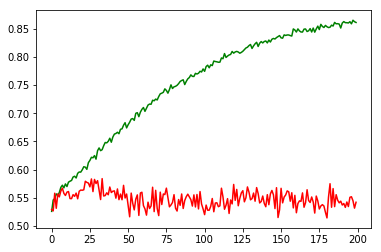

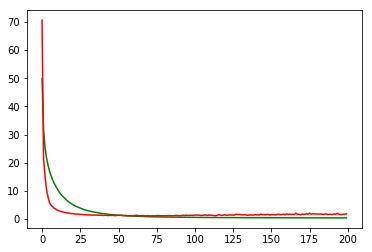

working on d,u and l,learn 0.5 128 0.01 0.0001


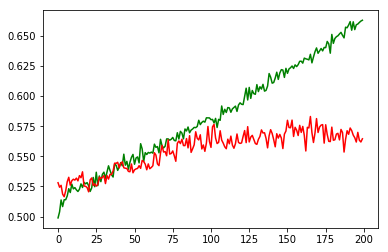

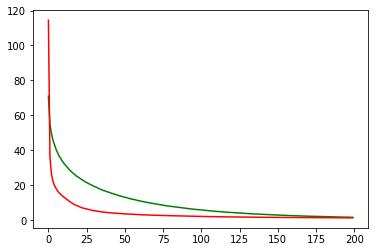

working on d,u and l,learn 0.5 256 0.01 0.001


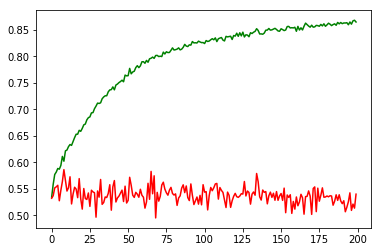

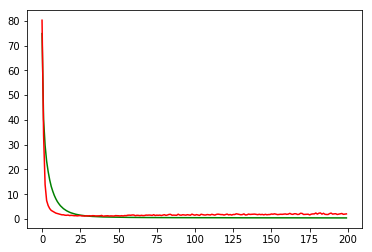

working on d,u and l,learn 0.5 256 0.01 0.0005


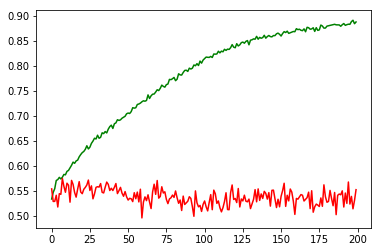

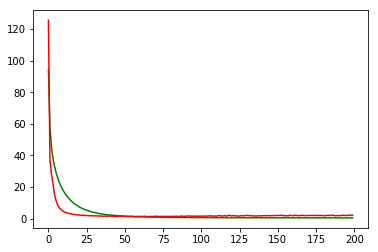

working on d,u and l,learn 0.5 256 0.01 0.0001


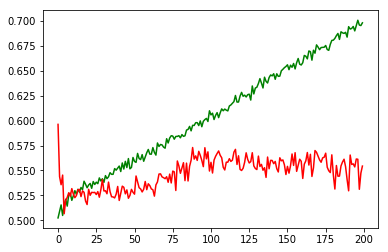

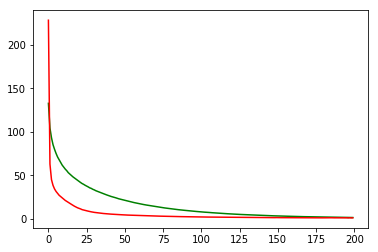

Chart for BEST MODEL FOR : AAPL
l,u,d,le:  0.01 128 0.5 0.0005


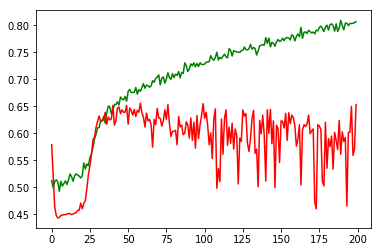

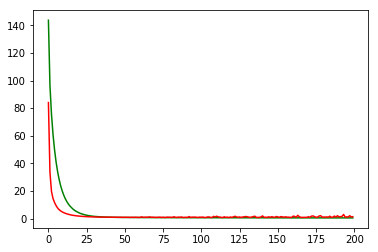

F1,score 0.604040404040404
G-score: 0.6447632875479938
Accuracy 0.653097345660218
Window: 140
[[439  67]
 [325 299]]
Vol pos 3.7547868104330027
Vol neg 2.0808820306186635
Real Percentage of gain: 89.34326545313174
Percentage of gain: 1.7303777965460532
Total gain: 1955.3269100970404
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.7409081]
ecco la somma Negativa: [0.07582815]
[[345  33]
 [274 101]]
753/753 [==============================] - 0s 51us/step
[1.5271329633980633, 0.5922974769179407]
Percentile:  1
ecco la somma Positiva: [0.87524736]
ecco la somma Negativa: [0.09758106]
[[38 30]
 [35 49]]
152/152 [==============================] - 0s 55us/step
[1.5439282675322734, 0.5723684210526315]
Percentile:  2
ecco la somma Positiva: [0.8767163]
ecco la somma Negativa: [0.09504016]
[[56  4]
 [ 2 77]]
139/139 [==============================] - 0s 40us/step
[0.21344026263883645, 0.9568345323741008]
Percentile:  3
ecco la somma Positiva: [0.7449602

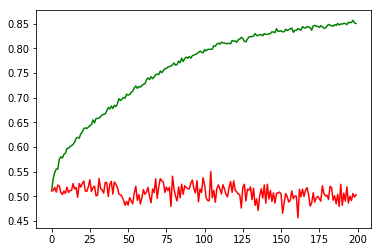

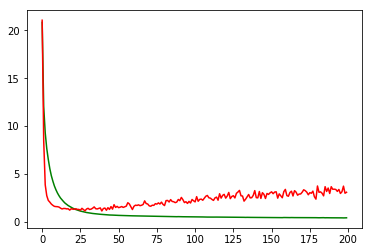

working on d,u and l,learn 0.5 64 0.01 0.0005


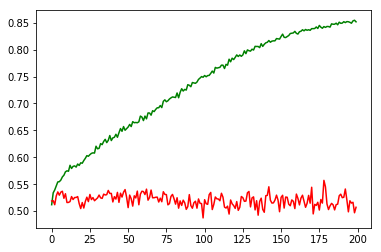

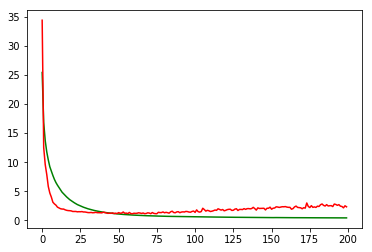

working on d,u and l,learn 0.5 64 0.01 0.0001


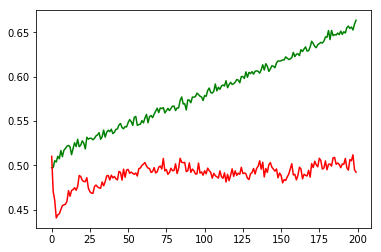

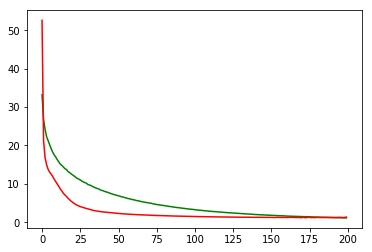

working on d,u and l,learn 0.5 128 0.01 0.001


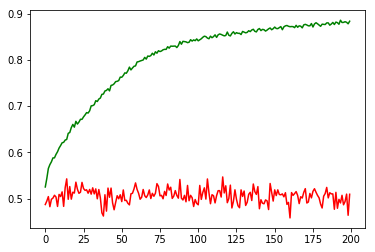

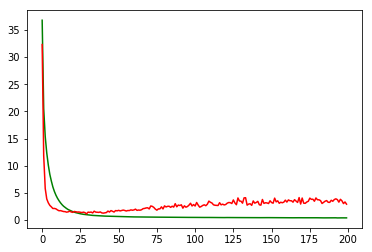

working on d,u and l,learn 0.5 128 0.01 0.0005


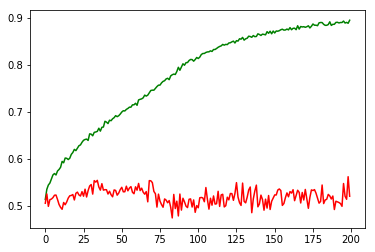

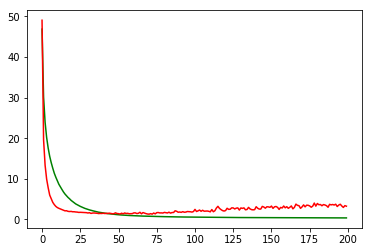

working on d,u and l,learn 0.5 128 0.01 0.0001


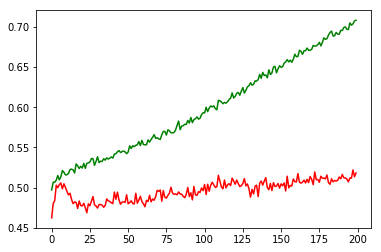

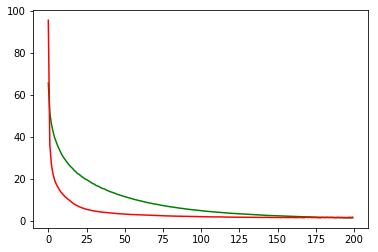

working on d,u and l,learn 0.5 256 0.01 0.001


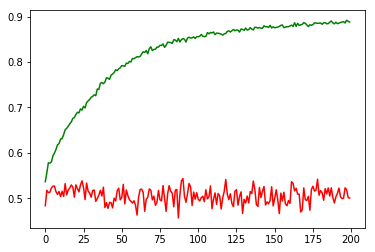

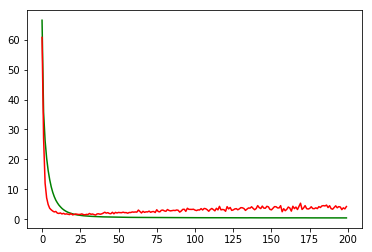

working on d,u and l,learn 0.5 256 0.01 0.0005


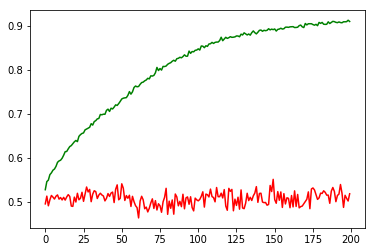

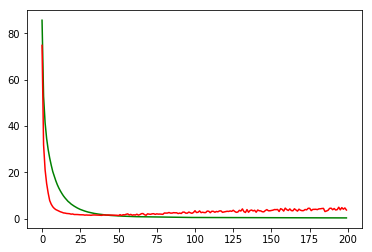

working on d,u and l,learn 0.5 256 0.01 0.0001


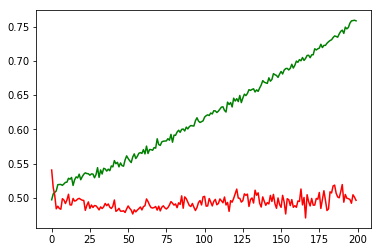

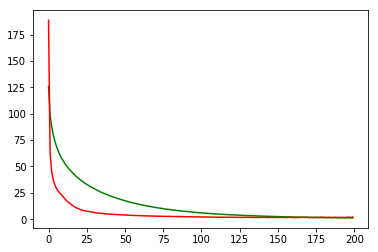

Chart for BEST MODEL FOR : AMZN
l,u,d,le:  0.01 128 0.5 0.001


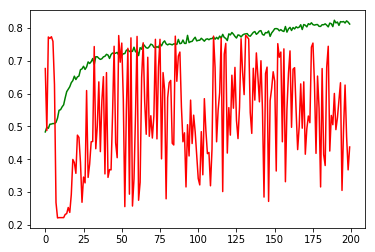

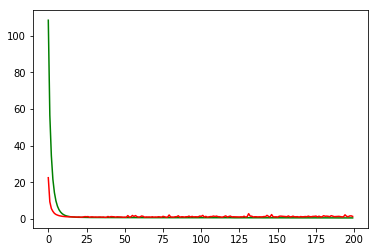

F1,score 0.49564528899445764
G-score: 0.5075549268250549
Accuracy 0.43727915173284576
Window: 140
[[182  69]
 [568 313]]
Vol pos 2.071884113656567
Vol neg 2.5891178535947983
Real Percentage of gain: -44.96790770730906
Percentage of gain: -0.550958866148309
Total gain: -623.6854364798858
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.78542984]
ecco la somma Negativa: [0.22435053]
[[160  39]
 [296 135]]
630/630 [==============================] - 0s 44us/step
[1.1644509843417576, 0.46825396901085264]
Percentile:  1
ecco la somma Positiva: [0.8659788]
ecco la somma Negativa: [0.34093744]
[[ 20  16]
 [207 142]]
385/385 [==============================] - 0s 40us/step
[1.2625549031651349, 0.42077922077922075]
Percentile:  2
ecco la somma Positiva: [0.85266626]
ecco la somma Negativa: [0.36695647]
[[ 2 14]
 [26 34]]
76/76 [==============================] - 0s 48us/step
[1.1524809347955804, 0.47368421052631576]
Percentile:  3
ecco la somma Positiva: [

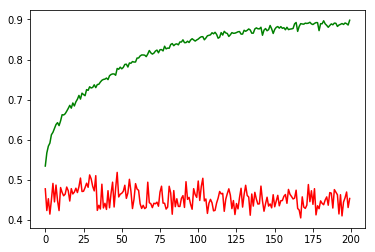

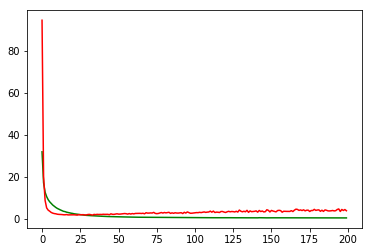

working on d,u and l,learn 0.5 64 0.01 0.0005


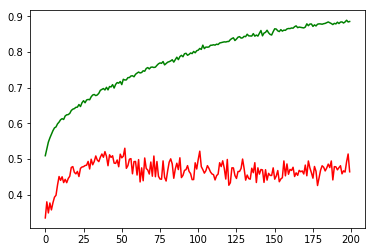

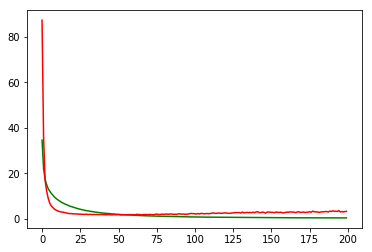

working on d,u and l,learn 0.5 64 0.01 0.0001


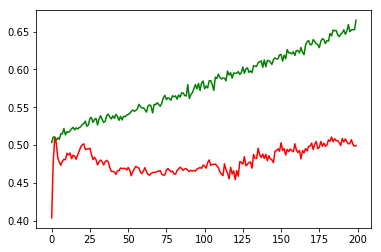

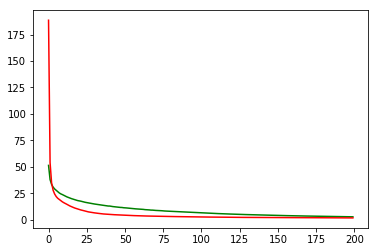

working on d,u and l,learn 0.5 128 0.01 0.001


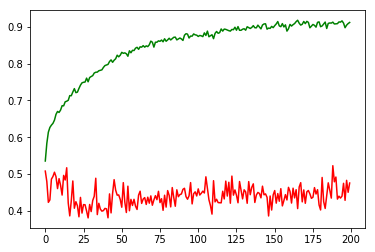

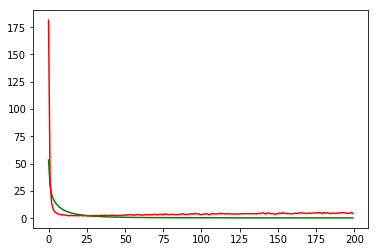

working on d,u and l,learn 0.5 128 0.01 0.0005


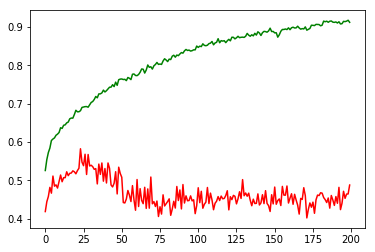

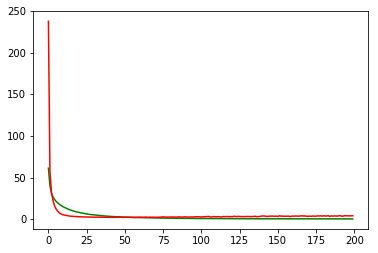

working on d,u and l,learn 0.5 128 0.01 0.0001


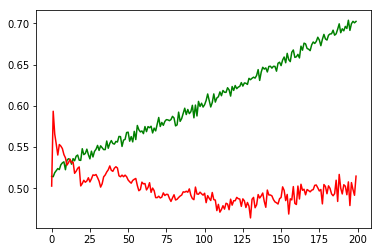

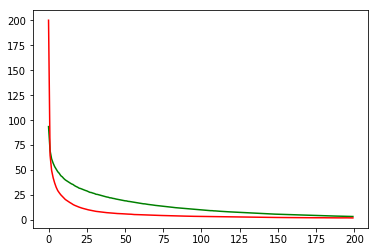

working on d,u and l,learn 0.5 256 0.01 0.001


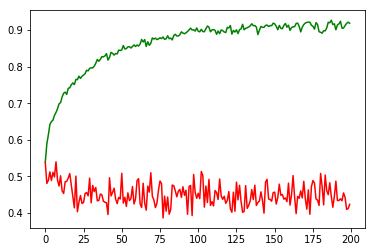

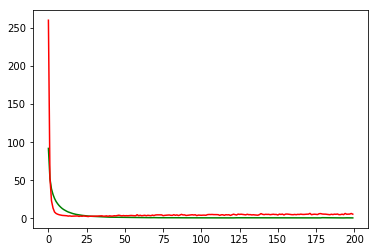

working on d,u and l,learn 0.5 256 0.01 0.0005


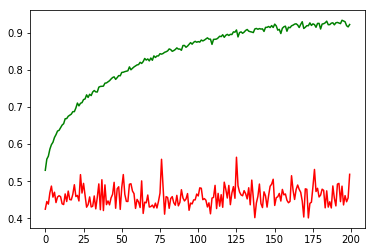

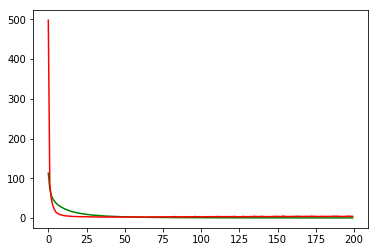

working on d,u and l,learn 0.5 256 0.01 0.0001


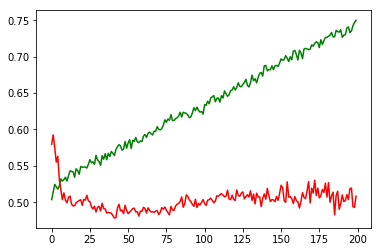

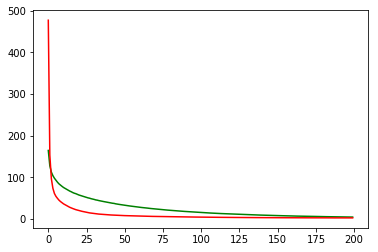

Chart for BEST MODEL FOR : PEP
l,u,d,le:  0.01 256 0.5 0.0001


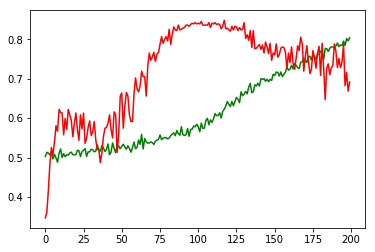

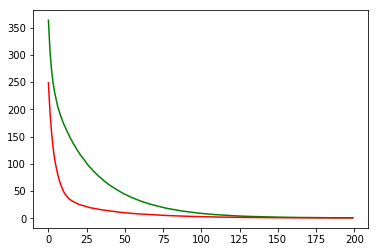

F1,score 0.7904066736183525
G-score: 0.7266647103416314
Accuracy 0.6912442396313364
Window: 140
[[ 71  20]
 [181 379]]
Vol pos 2.377007622866442
Vol neg 1.4227783690591835
Real Percentage of gain: 58.95539473461729
Percentage of gain: 1.2038018096912488
Total gain: 783.674978109003
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.72078294]
ecco la somma Negativa: [0.20889086]
[[53 19]
 [47 63]]
182/182 [==============================] - 0s 74us/step
[0.8515010626761468, 0.6373626378538845]
Percentile:  1
ecco la somma Positiva: [0.67746115]
ecco la somma Negativa: [0.17536946]
[[18  1]
 [91 51]]
161/161 [==============================] - 0s 65us/step
[1.0959270903782814, 0.42857142857142855]
Percentile:  2
ecco la somma Positiva: [0.7829378]
[[  0   0]
 [ 41 145]]
186/186 [==============================] - 0s 62us/step
[0.6101540602663512, 0.7795698899094776]
Percentile:  3
ecco la somma Positiva: [0.88499093]
[[ 0  0]
 [ 1 75]]
76/76 [========

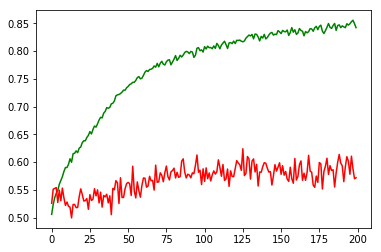

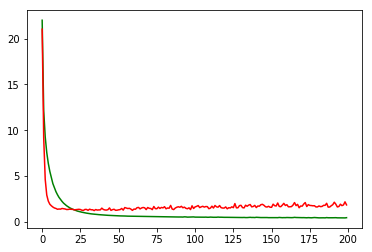

working on d,u and l,learn 0.5 64 0.01 0.0005


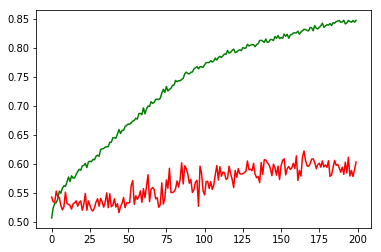

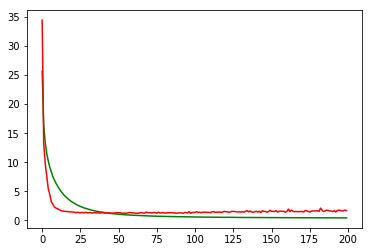

working on d,u and l,learn 0.5 64 0.01 0.0001


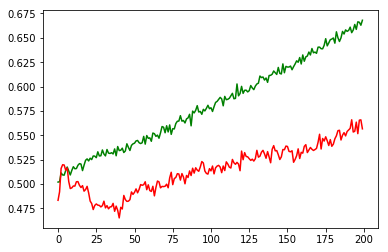

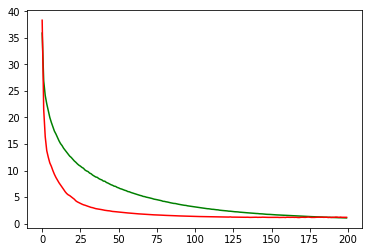

working on d,u and l,learn 0.5 128 0.01 0.001


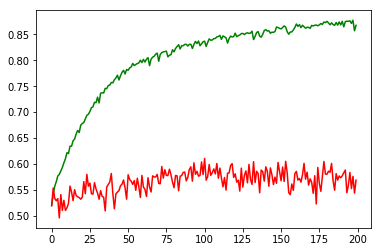

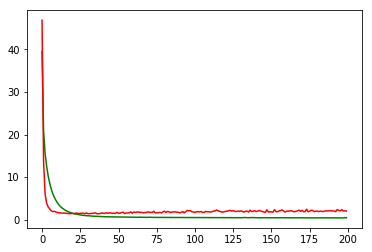

working on d,u and l,learn 0.5 128 0.01 0.0005


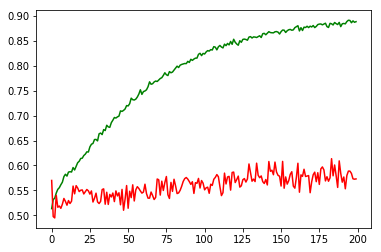

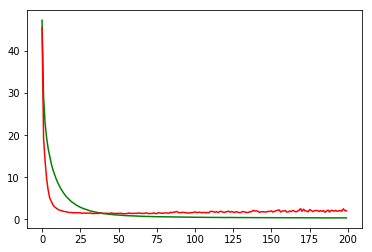

working on d,u and l,learn 0.5 128 0.01 0.0001


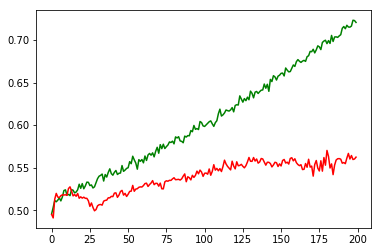

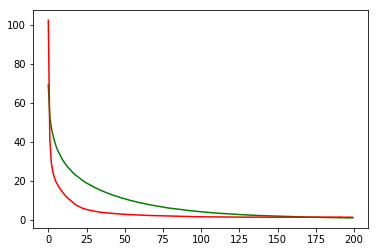

working on d,u and l,learn 0.5 256 0.01 0.001


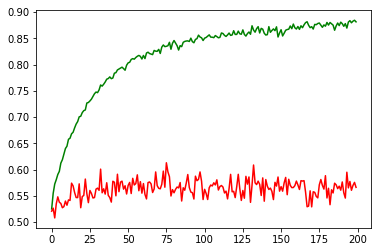

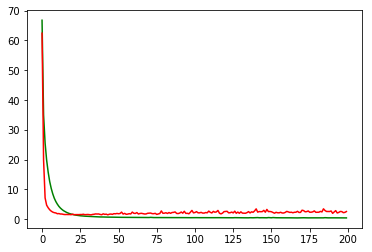

working on d,u and l,learn 0.5 256 0.01 0.0005


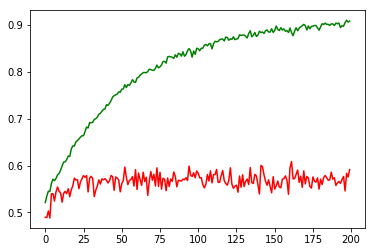

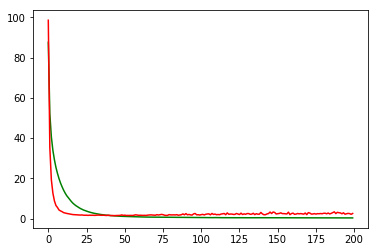

working on d,u and l,learn 0.5 256 0.01 0.0001


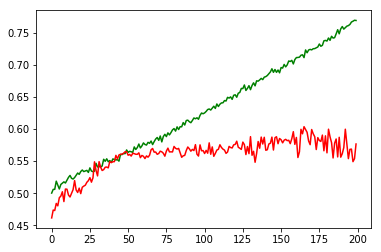

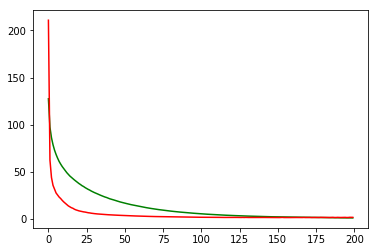

Chart for BEST MODEL FOR : GOOGL
l,u,d,le:  0.01 64 0.5 0.0005


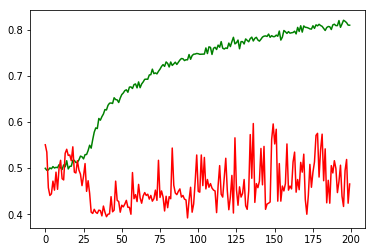

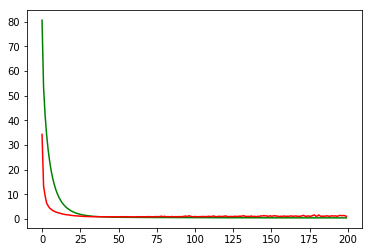

F1,score 0.4124513618677043
G-score: 0.4655594749821173
Accuracy 0.46548672600657537
Window: 140
[[314 141]
 [463 212]]
Vol pos 2.833288813347853
Vol neg 3.061540350426272
Real Percentage of gain: -46.4057011056047
Percentage of gain: -0.3175756246340686
Total gain: -358.8604558364975
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.7737289]
ecco la somma Negativa: [0.26357463]
[[160  72]
 [130  49]]
411/411 [==============================] - 0s 76us/step
[0.9120956380871961, 0.5085158151939257]
Percentile:  1
ecco la somma Positiva: [0.78777325]
ecco la somma Negativa: [0.28578767]
[[ 82  29]
 [167  85]]
363/363 [==============================] - 0s 72us/step
[1.147351409449722, 0.4600550965008328]
Percentile:  2
ecco la somma Positiva: [0.7121845]
ecco la somma Negativa: [0.27357092]
[[66 31]
 [83 26]]
206/206 [==============================] - 0s 62us/step
[1.1454709235904286, 0.4466019426156016]
Percentile:  3
ecco la somma Positiva: [0.693

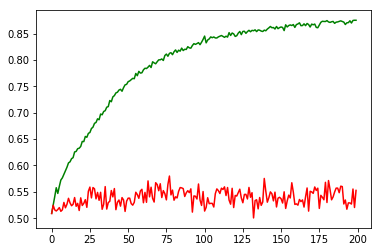

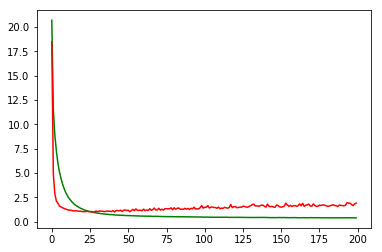

working on d,u and l,learn 0.5 64 0.01 0.0005


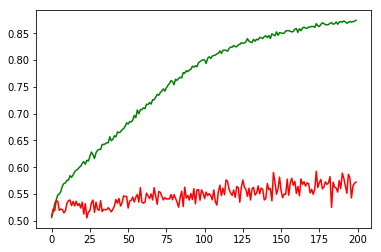

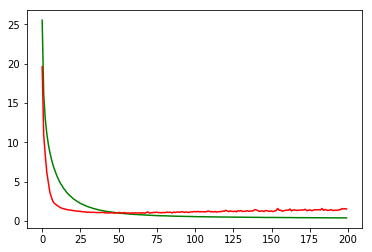

working on d,u and l,learn 0.5 64 0.01 0.0001


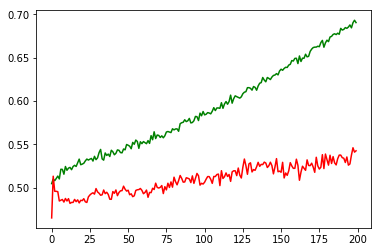

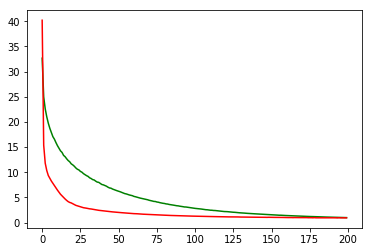

working on d,u and l,learn 0.5 128 0.01 0.001


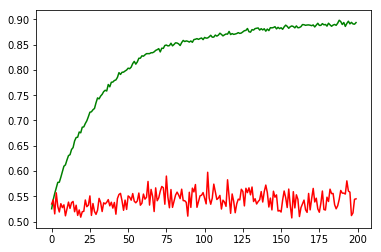

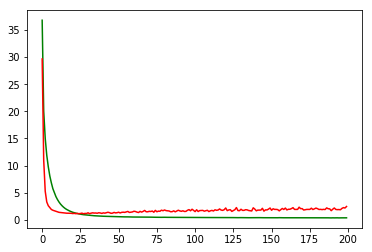

working on d,u and l,learn 0.5 128 0.01 0.0005


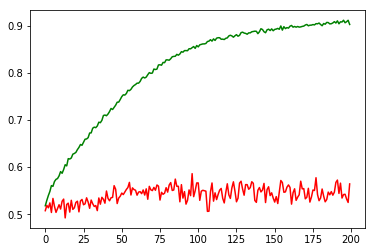

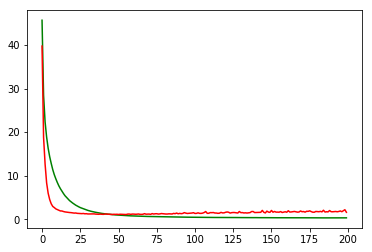

working on d,u and l,learn 0.5 128 0.01 0.0001


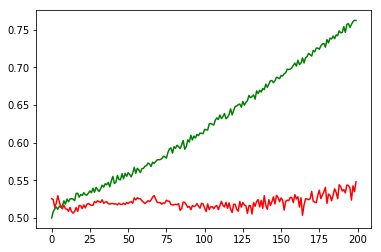

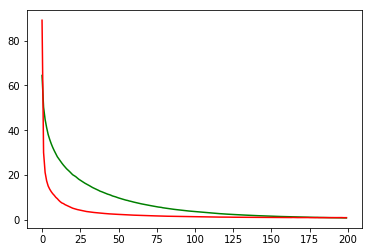

working on d,u and l,learn 0.5 256 0.01 0.001


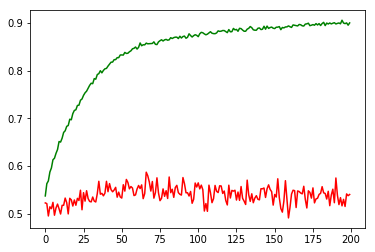

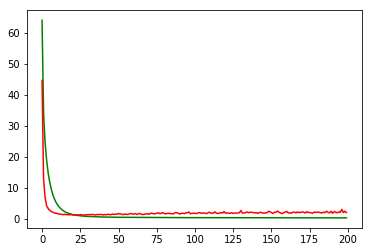

working on d,u and l,learn 0.5 256 0.01 0.0005


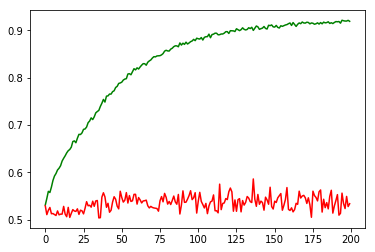

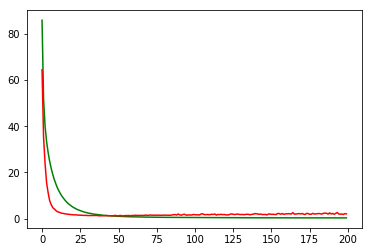

working on d,u and l,learn 0.5 256 0.01 0.0001


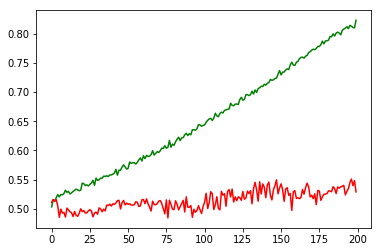

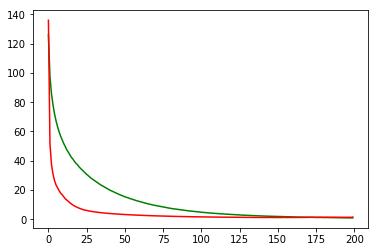

Chart for BEST MODEL FOR : MSFT
l,u,d,le:  0.01 128 0.5 0.0005


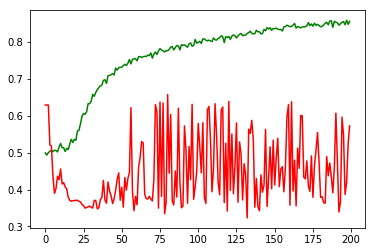

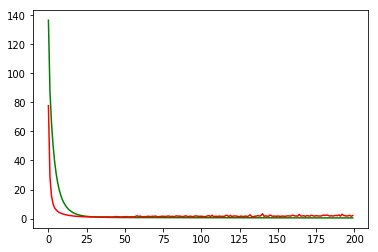

F1,score 0.6944971537001897
G-score: 0.4249691441163148
Accuracy 0.5725663732638401
Window: 140
[[ 98 321]
 [162 549]]
Vol pos 1.6519068561928099
Vol neg 1.4722375104457692
Real Percentage of gain: 59.83125672345007
Percentage of gain: 0.31654249416941715
Total gain: 357.69301841144136
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.9055061]
ecco la somma Negativa: [0.23058446]
[[ 78 214]
 [ 62 190]]
544/544 [==============================] - 0s 74us/step
[2.212700224974576, 0.49264705882352944]
Percentile:  1
ecco la somma Positiva: [0.86909425]
ecco la somma Negativa: [0.23775257]
[[ 15  59]
 [ 29 210]]
313/313 [==============================] - 0s 72us/step
[1.2907544812455345, 0.7188498404460212]
Percentile:  2
ecco la somma Positiva: [0.83215815]
ecco la somma Negativa: [0.3918534]
[[ 4 19]
 [55 85]]
163/163 [==============================] - 0s 67us/step
[1.581824951010979, 0.546012270304323]
Percentile:  3
ecco la somma Positiva: [0.877

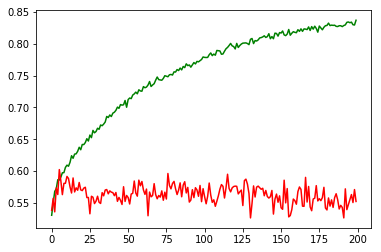

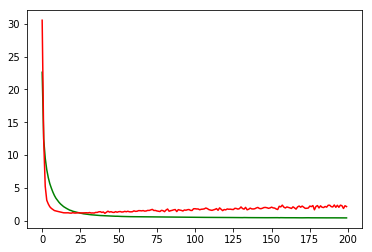

working on d,u and l,learn 0.5 64 0.01 0.0005


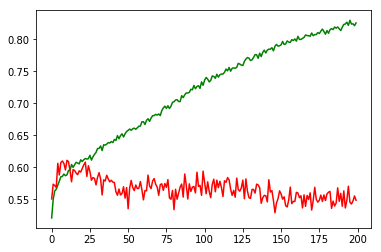

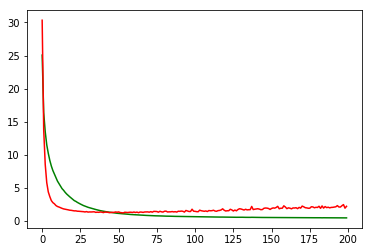

working on d,u and l,learn 0.5 64 0.01 0.0001


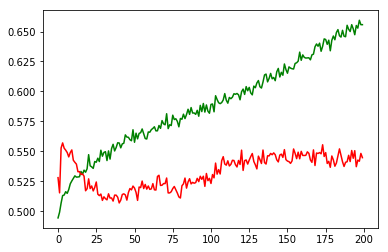

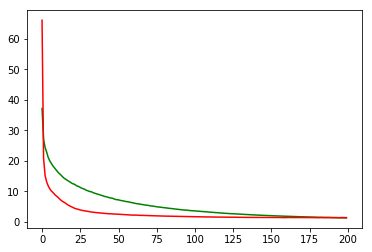

working on d,u and l,learn 0.5 128 0.01 0.001


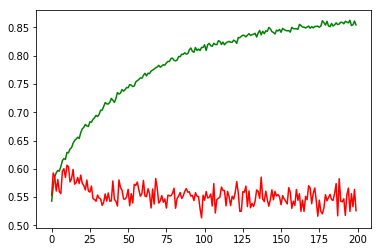

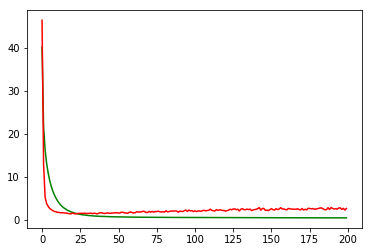

working on d,u and l,learn 0.5 128 0.01 0.0005


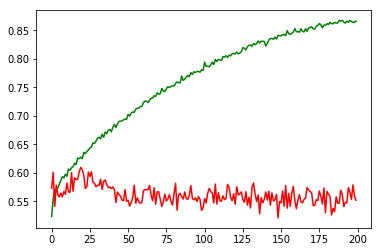

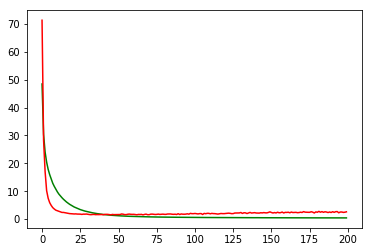

working on d,u and l,learn 0.5 128 0.01 0.0001


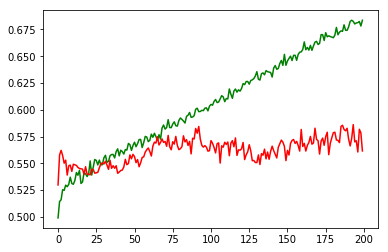

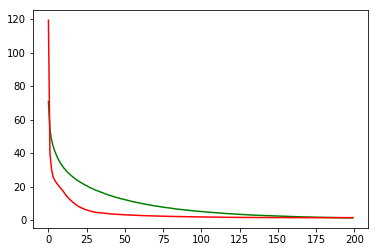

working on d,u and l,learn 0.5 256 0.01 0.001


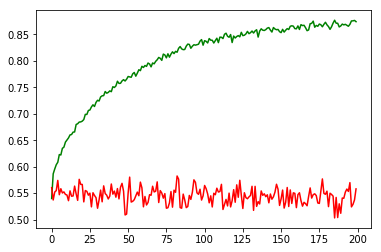

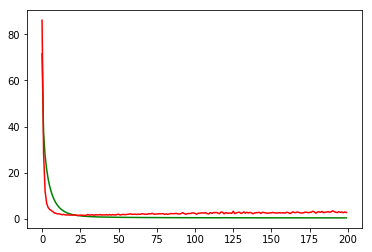

working on d,u and l,learn 0.5 256 0.01 0.0005


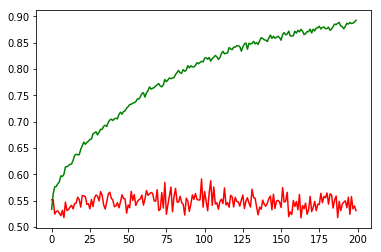

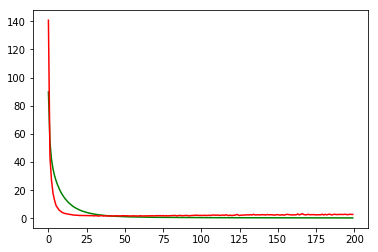

working on d,u and l,learn 0.5 256 0.01 0.0001


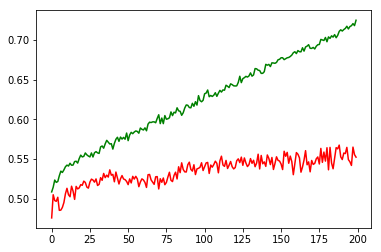

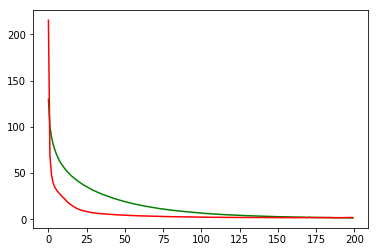

Chart for BEST MODEL FOR : FB
l,u,d,le:  0.01 64 0.5 0.0005


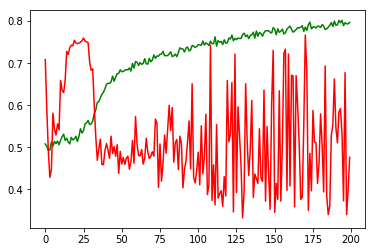

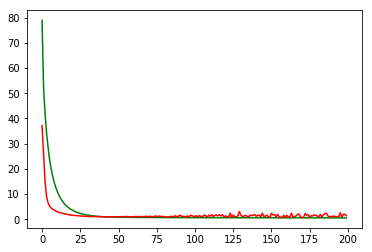

F1,score 0.5289912629070691
G-score: 0.5478579454134006
Accuracy 0.4761484099137383
Window: 140
[[206  57]
 [536 333]]
Vol pos 3.265464558410574
Vol neg 2.9069760583400086
Real Percentage of gain: -73.6725858666226
Percentage of gain: 0.03202172649087836
Total gain: 36.2485943876743
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.7569539]
ecco la somma Negativa: [0.08000744]
[[196  16]
 [250  60]]
522/522 [==============================] - 0s 125us/step
[1.2748161951700847, 0.4904214559386973]
Percentile:  1
ecco la somma Positiva: [0.79201615]
ecco la somma Negativa: [0.25307813]
[[  6  31]
 [251 180]]
468/468 [==============================] - 0s 87us/step
[1.5916259166521904, 0.3974358974358974]
Percentile:  2
ecco la somma Positiva: [0.81246674]
ecco la somma Negativa: [0.4018298]
[[ 3 10]
 [35 57]]
105/105 [==============================] - 0s 104us/step
[0.9383070241837275, 0.5714285714995293]
Percentile:  3
ecco la somma Positiva: [0.92

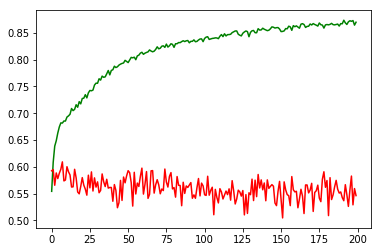

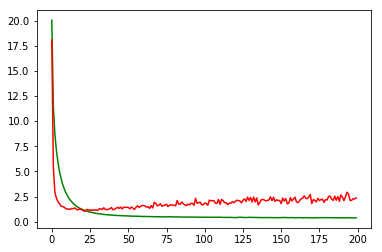

working on d,u and l,learn 0.5 64 0.01 0.0005


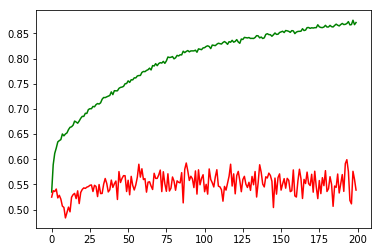

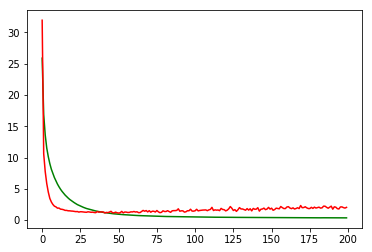

working on d,u and l,learn 0.5 64 0.01 0.0001


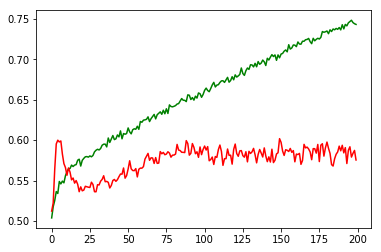

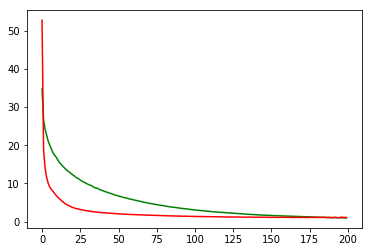

working on d,u and l,learn 0.5 128 0.01 0.001


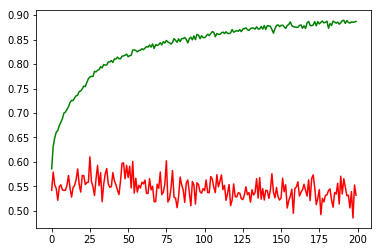

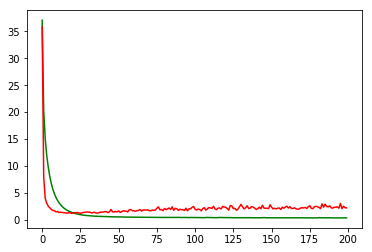

working on d,u and l,learn 0.5 128 0.01 0.0005


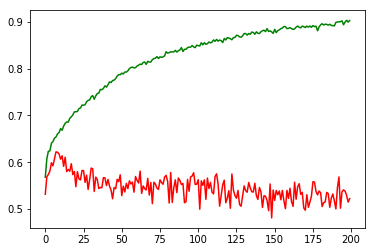

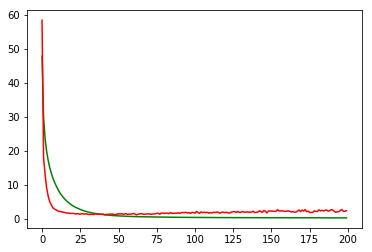

working on d,u and l,learn 0.5 128 0.01 0.0001


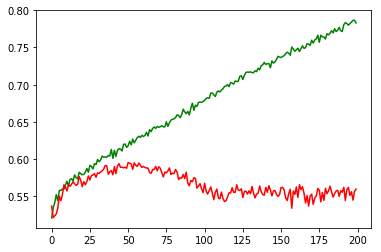

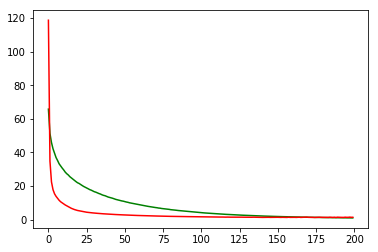

working on d,u and l,learn 0.5 256 0.01 0.001


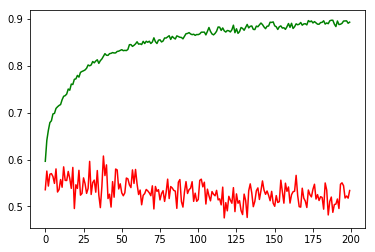

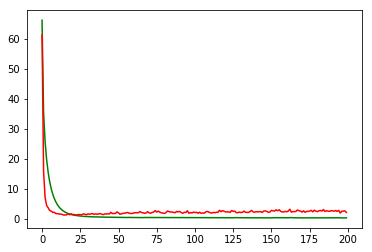

working on d,u and l,learn 0.5 256 0.01 0.0005


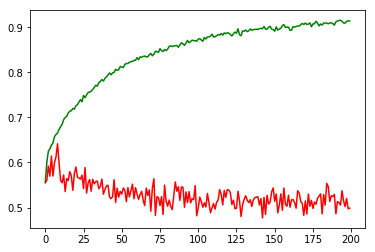

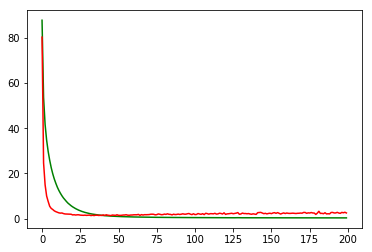

working on d,u and l,learn 0.5 256 0.01 0.0001


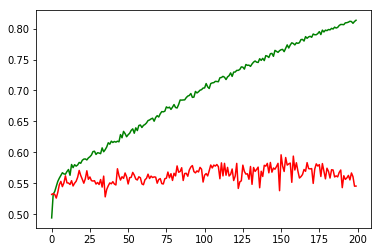

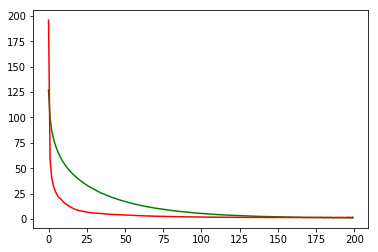

Chart for BEST MODEL FOR : INTC
l,u,d,le:  0.01 128 0.5 0.001


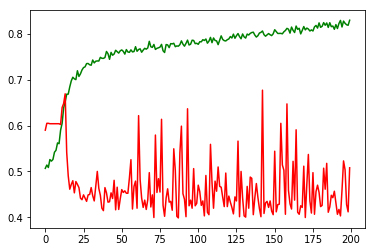

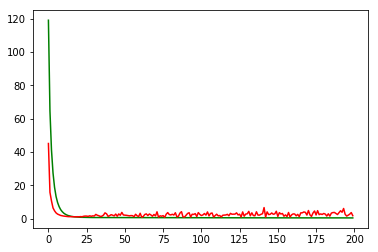

F1,score 0.43451776649746193
G-score: 0.5021037093276994
Accuracy 0.5079505287716329
Window: 140
[[361  87]
 [470 214]]
Vol pos 2.5682237340405494
Vol neg 2.0848447114904327
Real Percentage of gain: -36.50667627421929
Percentage of gain: 0.27868387170772524
Total gain: 315.47014277314497
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.8112608]
ecco la somma Negativa: [0.10206349]
[[ 88  28]
 [181  57]]
354/354 [==============================] - 0s 99us/step
[2.437335070917162, 0.4096045197740113]
Percentile:  1
ecco la somma Positiva: [0.845349]
ecco la somma Negativa: [0.04196735]
[[ 91  23]
 [151  77]]
342/342 [==============================] - 0s 120us/step
[1.579642696164505, 0.49122807017543857]
Percentile:  2
ecco la somma Positiva: [0.8170798]
ecco la somma Negativa: [0.04615155]
[[101  26]
 [ 92  59]]
278/278 [==============================] - 0s 102us/step
[1.2267867186301047, 0.5755395704893758]
Percentile:  3
ecco la somma Positiva:

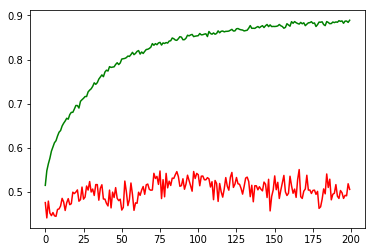

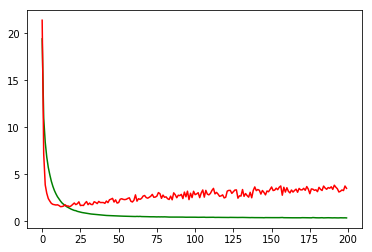

working on d,u and l,learn 0.5 64 0.01 0.0005


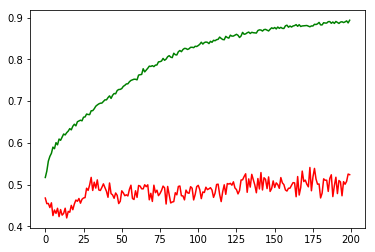

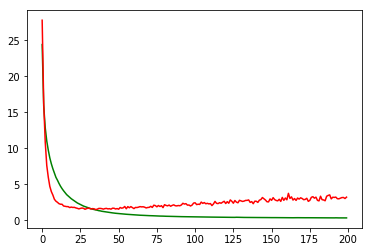

working on d,u and l,learn 0.5 64 0.01 0.0001


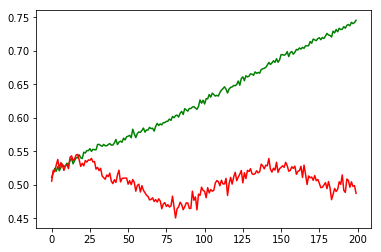

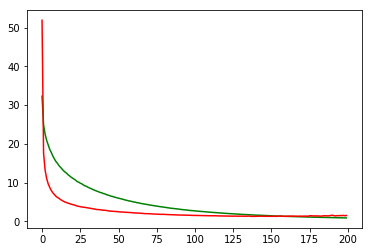

working on d,u and l,learn 0.5 128 0.01 0.001


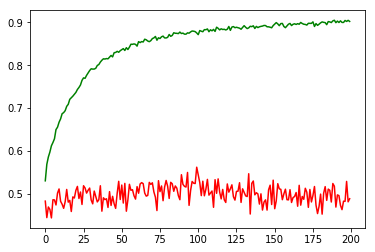

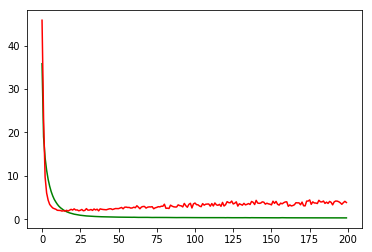

working on d,u and l,learn 0.5 128 0.01 0.0005


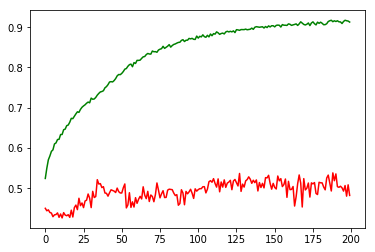

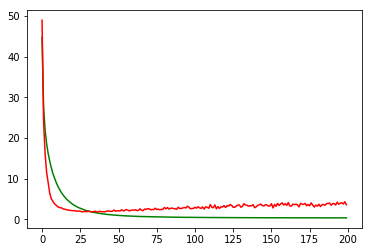

working on d,u and l,learn 0.5 128 0.01 0.0001


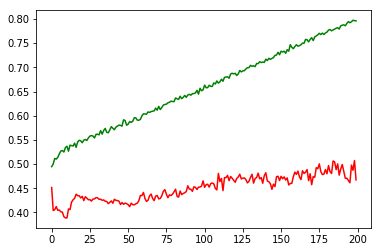

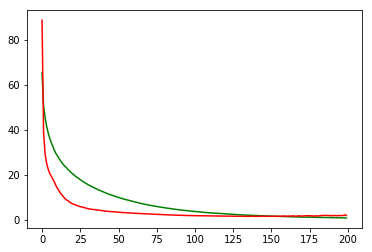

working on d,u and l,learn 0.5 256 0.01 0.001


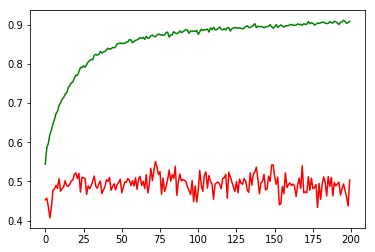

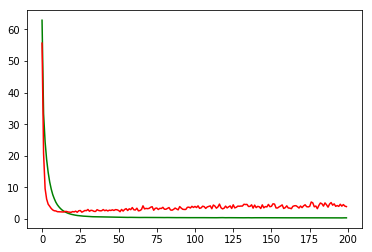

working on d,u and l,learn 0.5 256 0.01 0.0005


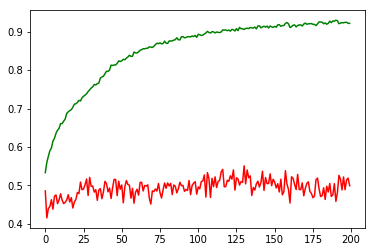

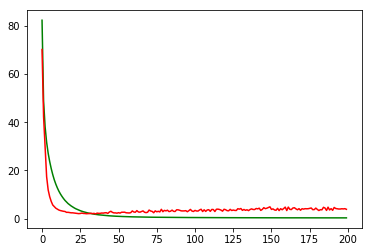

working on d,u and l,learn 0.5 256 0.01 0.0001


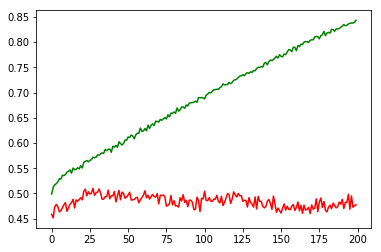

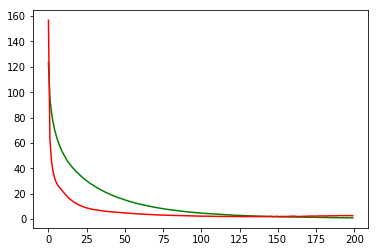

Chart for BEST MODEL FOR : CSCO
l,u,d,le:  0.01 256 0.5 0.001


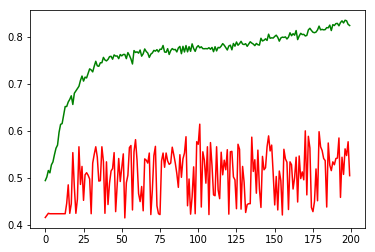

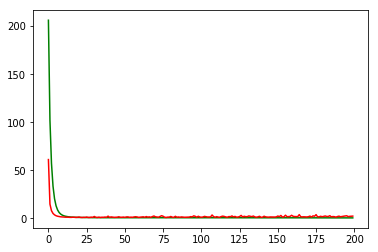

F1,score 0.3619702176403207
G-score: 0.45779788231641527
Accuracy 0.504888887670305
Window: 140
[[410  67]
 [490 158]]
Vol pos 2.2615782381936227
Vol neg 1.4133565114485918
Real Percentage of gain: 49.37388406890469
Percentage of gain: 0.44207721103743297
Total gain: 497.3368624171121
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.847874]
ecco la somma Negativa: [0.06109849]
[[162  58]
 [229  67]]
516/516 [==============================] - 0s 203us/step
[2.4834405229997265, 0.4437984496124031]
Percentile:  1
ecco la somma Positiva: [0.782298]
ecco la somma Negativa: [0.11108363]
[[ 88   8]
 [179  48]]
323/323 [==============================] - 0s 169us/step
[2.399623480374599, 0.4210526317634819]
Percentile:  2
ecco la somma Positiva: [0.7885029]
ecco la somma Negativa: [0.04451763]
[[49  1]
 [61 27]]
138/138 [==============================] - 0s 190us/step
[1.996353937231976, 0.5507246376811594]
Percentile:  3
ecco la somma Positiva: [0.7905

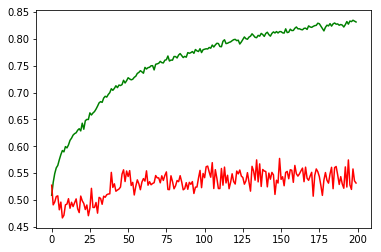

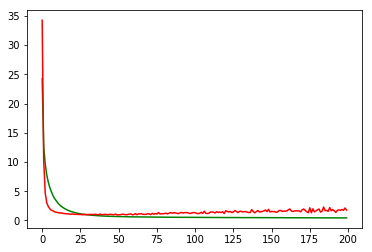

working on d,u and l,learn 0.5 64 0.01 0.0005


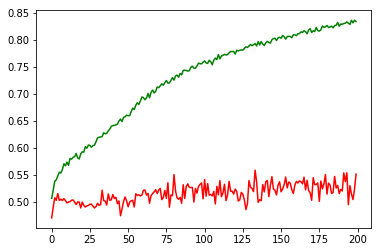

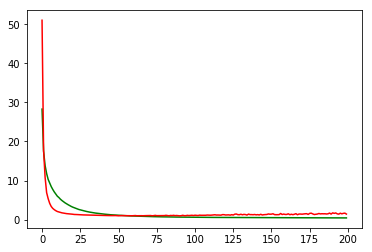

working on d,u and l,learn 0.5 64 0.01 0.0001


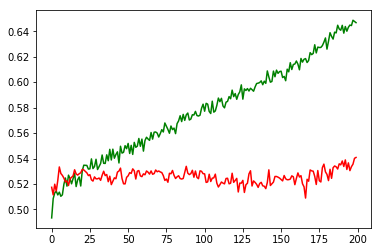

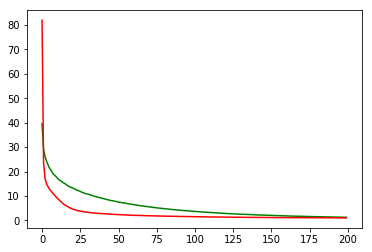

working on d,u and l,learn 0.5 128 0.01 0.001


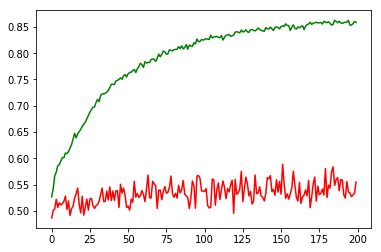

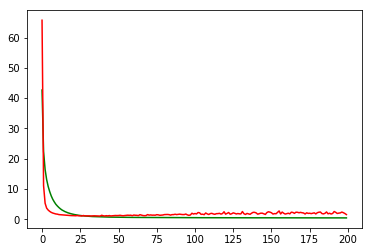

working on d,u and l,learn 0.5 128 0.01 0.0005


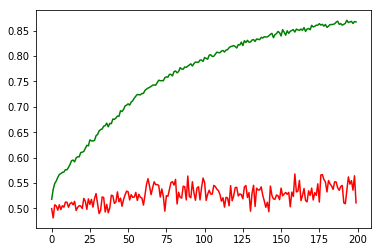

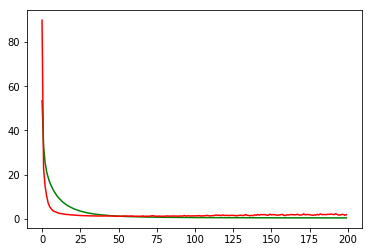

working on d,u and l,learn 0.5 128 0.01 0.0001


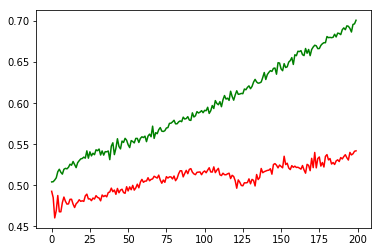

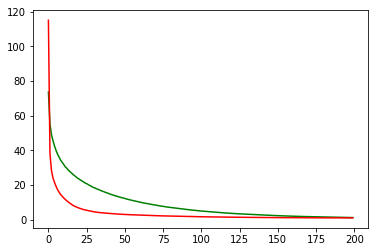

working on d,u and l,learn 0.5 256 0.01 0.001


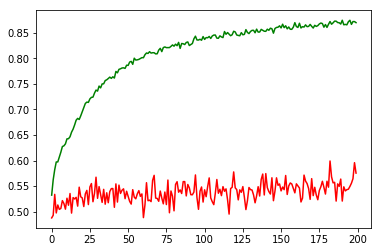

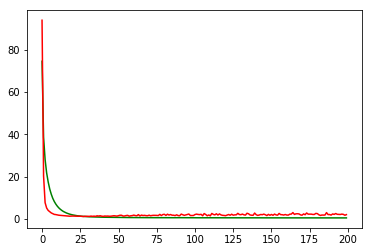

working on d,u and l,learn 0.5 256 0.01 0.0005


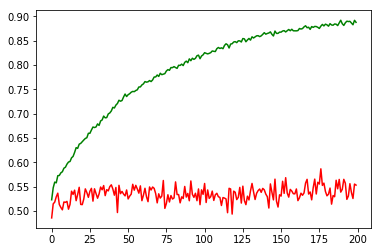

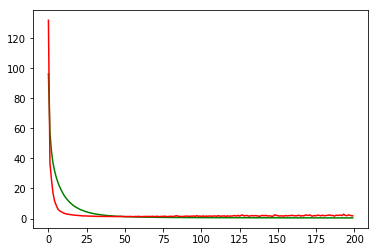

working on d,u and l,learn 0.5 256 0.01 0.0001


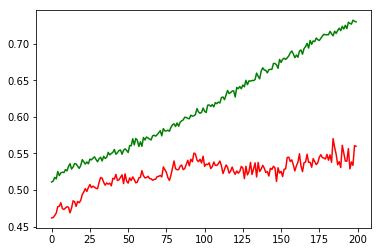

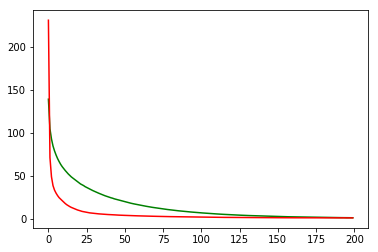

Chart for BEST MODEL FOR : CMCSA
l,u,d,le:  0.01 128 0.5 0.001


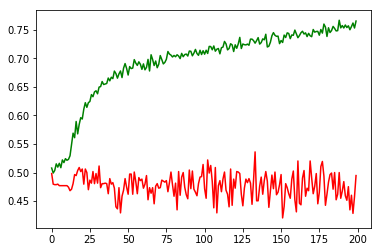

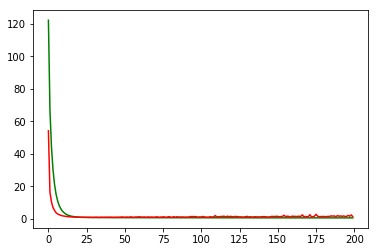

F1,score 0.3849462365591398
G-score: 0.46188224712605075
Accuracy 0.49469964474755546
Window: 140
[[381 159]
 [413 179]]
Vol pos 2.9693562332303687
Vol neg 2.746892730083701
Real Percentage of gain: -69.44834364063469
Percentage of gain: 0.08093361219181039
Total gain: 91.61684900112937
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.7376476]
ecco la somma Negativa: [0.24333122]
[[139  88]
 [143  58]]
428/428 [==============================] - 0s 193us/step
[1.1473069001581067, 0.4602803739710389]
Percentile:  1
ecco la somma Positiva: [0.71001434]
ecco la somma Negativa: [0.19717988]
[[155  42]
 [202 102]]
501/501 [==============================] - 0s 97us/step
[1.3612749778819893, 0.5129740520746646]
Percentile:  2
ecco la somma Positiva: [0.6009538]
ecco la somma Negativa: [0.2759486]
[[35  7]
 [58 16]]
116/116 [==============================] - 0s 112us/step
[1.1905522017643368, 0.4396551726707097]
Percentile:  3
ecco la somma Positiva: [0

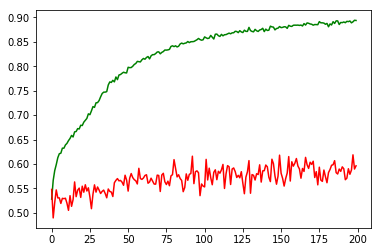

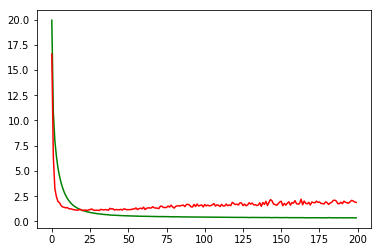

working on d,u and l,learn 0.5 64 0.01 0.0005


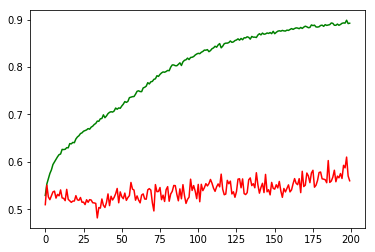

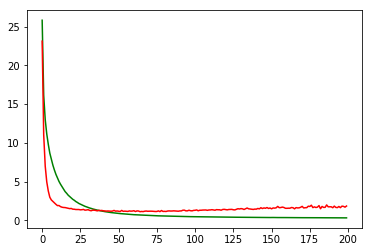

working on d,u and l,learn 0.5 64 0.01 0.0001


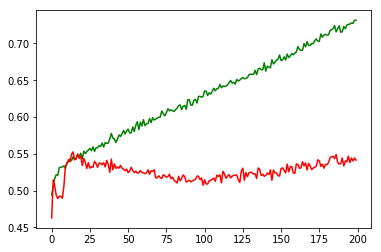

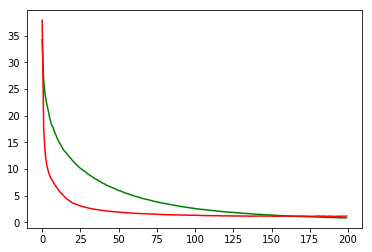

working on d,u and l,learn 0.5 128 0.01 0.001


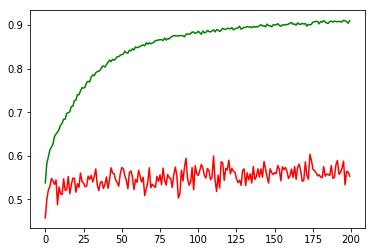

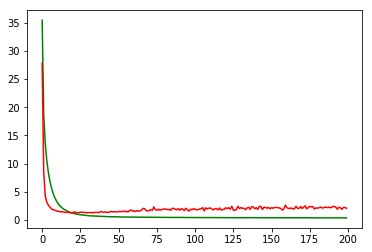

working on d,u and l,learn 0.5 128 0.01 0.0005


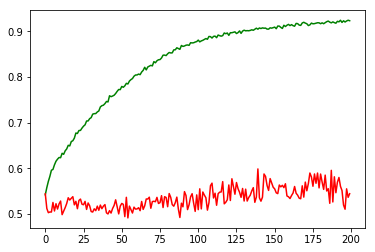

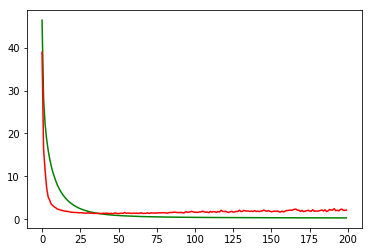

working on d,u and l,learn 0.5 128 0.01 0.0001


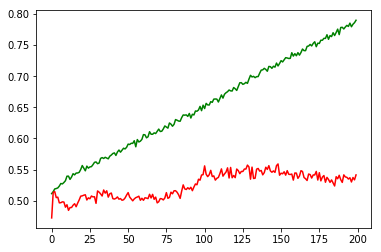

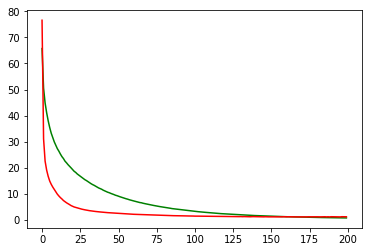

working on d,u and l,learn 0.5 256 0.01 0.001


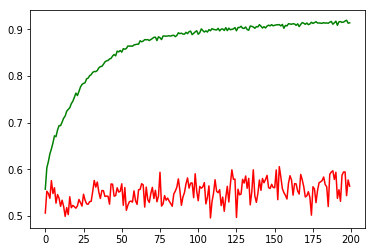

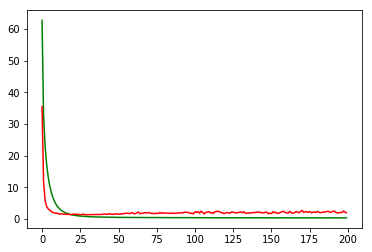

working on d,u and l,learn 0.5 256 0.01 0.0005


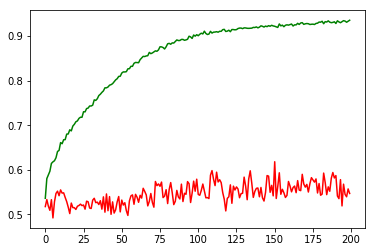

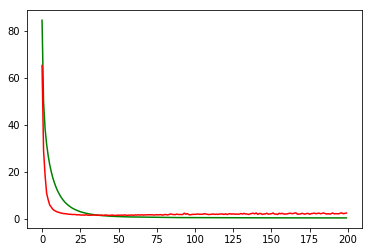

working on d,u and l,learn 0.5 256 0.01 0.0001


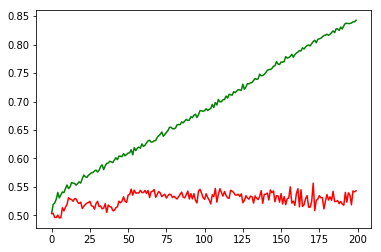

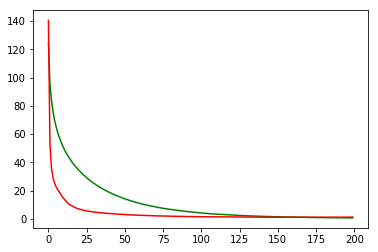

Chart for BEST MODEL FOR : NVDA
l,u,d,le:  0.01 64 0.5 0.001


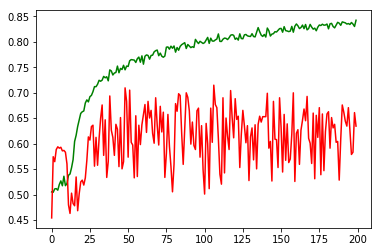

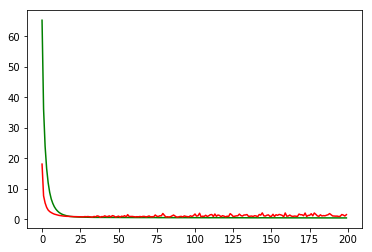

F1,score 0.6064638783269962
G-score: 0.6384492679287798
Accuracy 0.6342756209019638
Window: 140
[[399  77]
 [337 319]]
Vol pos 4.07173417323426
Vol neg 3.2460511437797703
Real Percentage of gain: 306.4868279403576
Percentage of gain: 1.3954416633015667
Total gain: 1579.6399628573736
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.9245174]
ecco la somma Negativa: [0.06496468]
[[260  53]
 [177  69]]
559/559 [==============================] - 0s 232us/step
[1.8583081471258924, 0.5885509843263302]
Percentile:  1
ecco la somma Positiva: [0.9066755]
ecco la somma Negativa: [0.03421294]
[[105  12]
 [ 92 128]]
337/337 [==============================] - 0s 218us/step
[0.9181788731808567, 0.6913946587537092]
Percentile:  2
ecco la somma Positiva: [0.91745687]
ecco la somma Negativa: [0.13052855]
[[24  7]
 [45 27]]
103/103 [==============================] - 0s 266us/step
[1.7183035276468517, 0.4951456313573041]
Percentile:  3
ecco la somma Positiva: [0.8

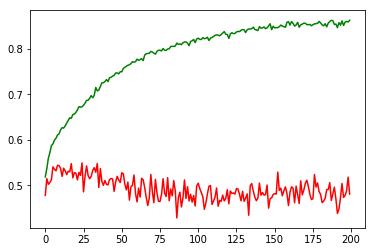

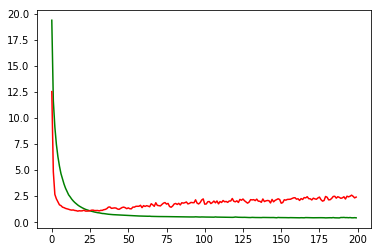

working on d,u and l,learn 0.5 64 0.01 0.0005


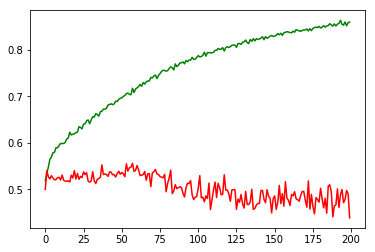

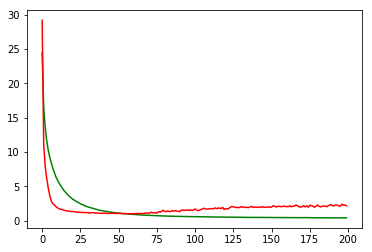

working on d,u and l,learn 0.5 64 0.01 0.0001


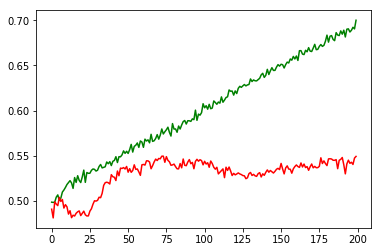

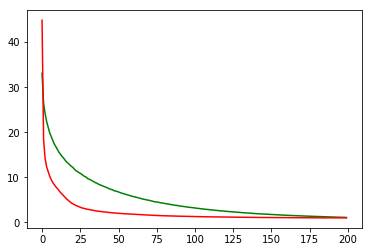

working on d,u and l,learn 0.5 128 0.01 0.001


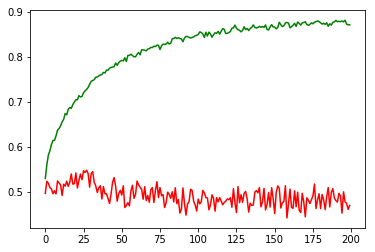

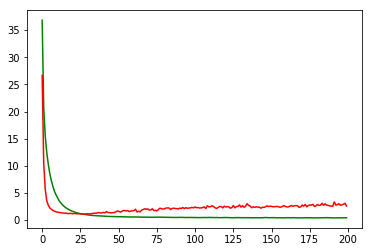

working on d,u and l,learn 0.5 128 0.01 0.0005


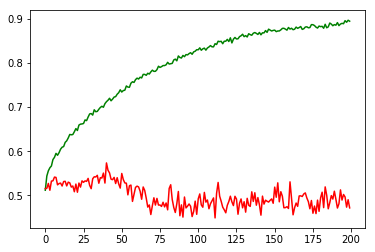

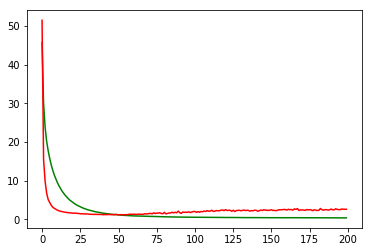

working on d,u and l,learn 0.5 128 0.01 0.0001


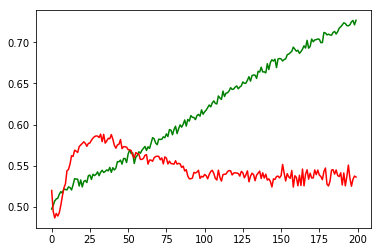

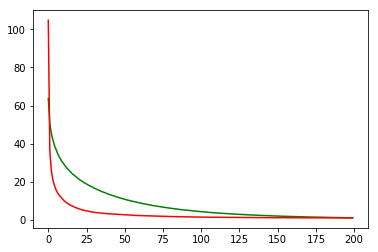

working on d,u and l,learn 0.5 256 0.01 0.001


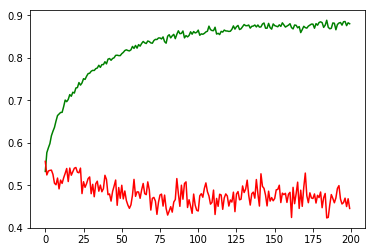

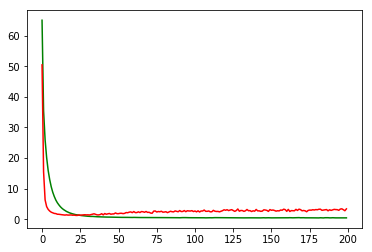

working on d,u and l,learn 0.5 256 0.01 0.0005


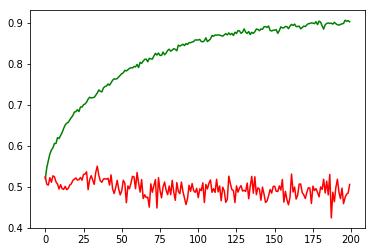

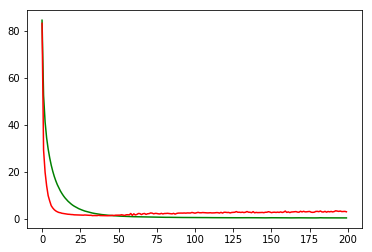

working on d,u and l,learn 0.5 256 0.01 0.0001


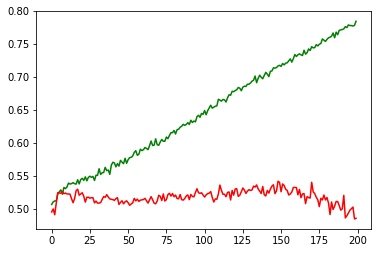

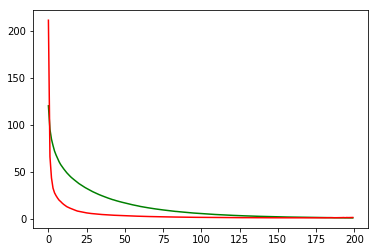

Chart for BEST MODEL FOR : NFLX
l,u,d,le:  0.01 128 0.5 0.0001


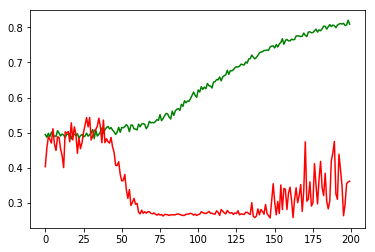

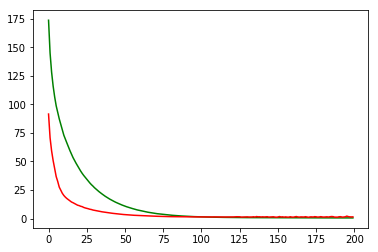

F1,score 0.413961038961039
G-score: 0.3992220100024908
Accuracy 0.3621908124049224
Window: 140
[[155 142]
 [580 255]]
Vol pos 3.9581074439436095
Vol neg 4.551636345912031
Real Percentage of gain: -158.1891957166279
Percentage of gain: -1.469485326618027
Total gain: -1663.4573897316066
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.74622744]
ecco la somma Negativa: [0.19980557]
[[114  56]
 [191  99]]
460/460 [==============================] - 0s 237us/step
[1.2048932505690533, 0.46304347826086956]
Percentile:  1
ecco la somma Positiva: [0.67297864]
ecco la somma Negativa: [0.29666862]
[[ 23  37]
 [206  62]]
328/328 [==============================] - 0s 246us/step
[1.4361121538208752, 0.25914634146341464]
Percentile:  2
ecco la somma Positiva: [0.66435635]
ecco la somma Negativa: [0.4699545]
[[  2  36]
 [140  55]]
233/233 [==============================] - 0s 244us/step
[1.5490850133445642, 0.2446351931330472]
Percentile:  3
ecco la somma Posit

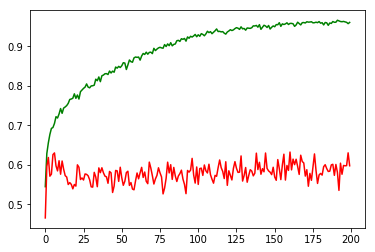

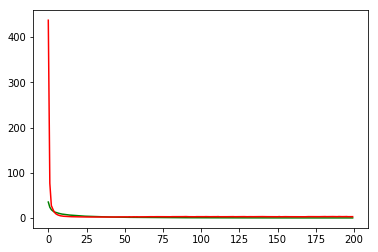

working on d,u and l,learn 0.5 64 0.01 0.0005


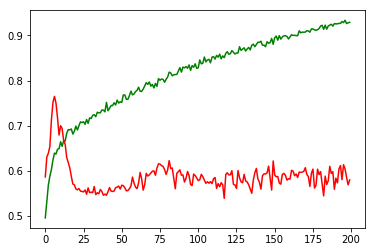

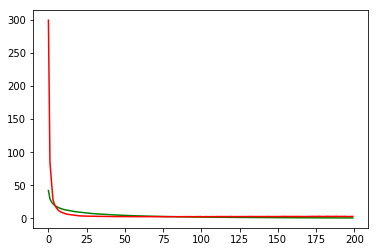

working on d,u and l,learn 0.5 64 0.01 0.0001


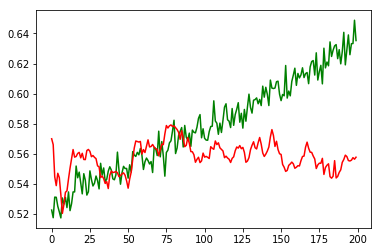

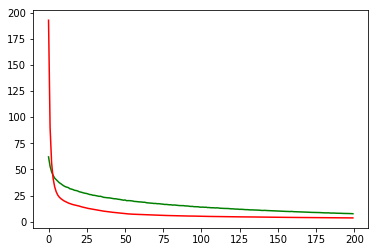

working on d,u and l,learn 0.5 128 0.01 0.001


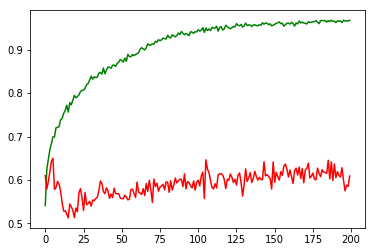

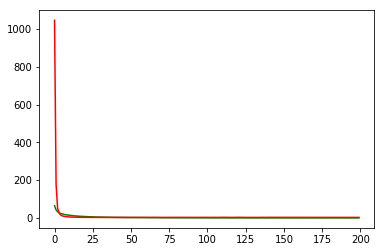

working on d,u and l,learn 0.5 128 0.01 0.0005


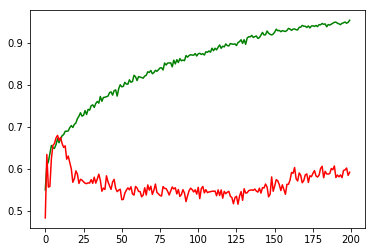

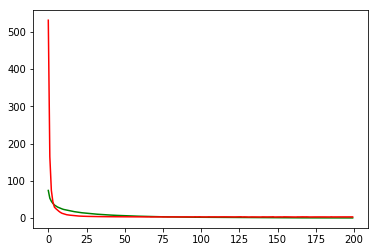

working on d,u and l,learn 0.5 128 0.01 0.0001


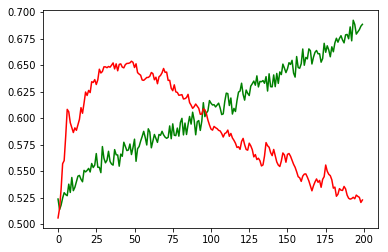

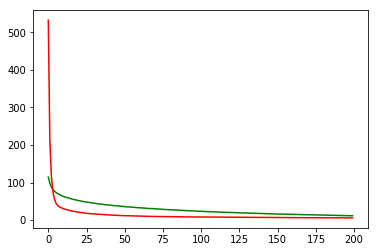

working on d,u and l,learn 0.5 256 0.01 0.001


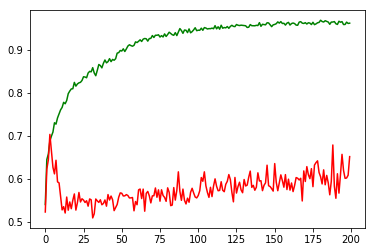

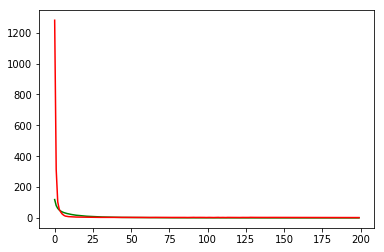

working on d,u and l,learn 0.5 256 0.01 0.0005


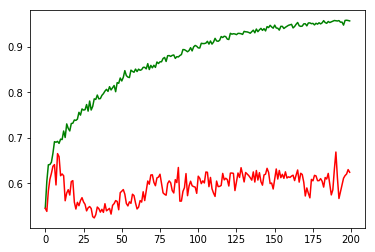

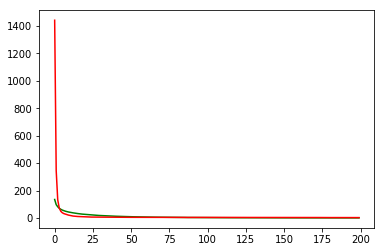

working on d,u and l,learn 0.5 256 0.01 0.0001


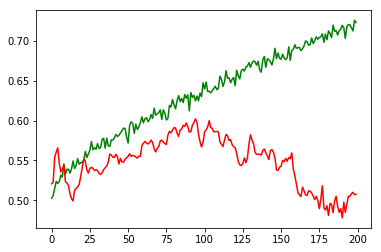

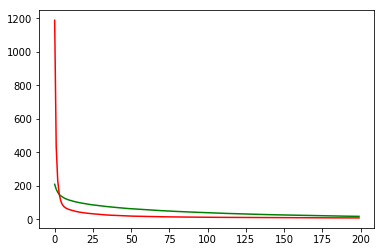

Chart for BEST MODEL FOR : BKNG
l,u,d,le:  0.01 256 0.5 0.001


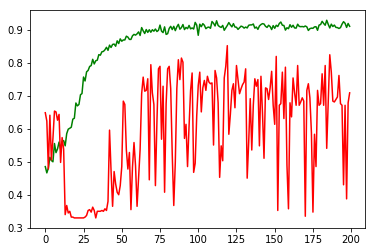

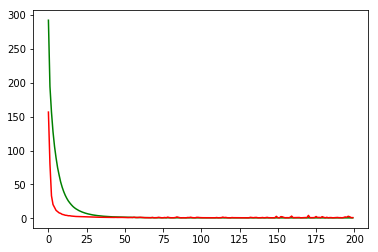

F1,score 0.8146964856230032
G-score: 0.44367064372838055
Accuracy 0.7085427126692767
Window: 140
[[ 27 104]
 [ 12 255]]
Vol pos 1.412957413227036
Vol neg 0.6171285432849332
Real Percentage of gain: 221.8017871889416
Percentage of gain: 0.8212740691180199
Total gain: 326.8670795089719
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.9290264]
ecco la somma Negativa: [0.37194234]
[[ 9 88]
 [ 1 74]]
172/172 [==============================] - 0s 263us/step
[1.2969783062851705, 0.48255813953488375]
Percentile:  1
ecco la somma Positiva: [0.89288336]
ecco la somma Negativa: [0.33444846]
[[12 14]
 [ 4 70]]
100/100 [==============================] - 0s 346us/step
[0.4578529405593872, 0.82]
Percentile:  2
ecco la somma Positiva: [0.8952182]
ecco la somma Negativa: [0.23341005]
[[ 6  1]
 [ 7 75]]
89/89 [==============================] - 0s 271us/step
[0.24357973859551246, 0.9101123675871431]
Percentile:  3
ecco la somma Positiva: [0.9217904]
[[23]]
23/23 

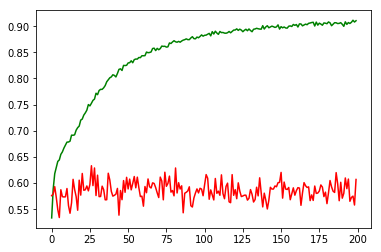

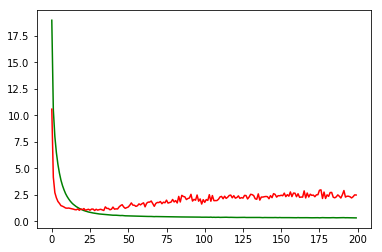

working on d,u and l,learn 0.5 64 0.01 0.0005


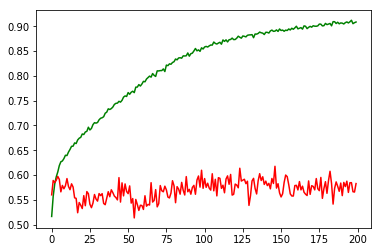

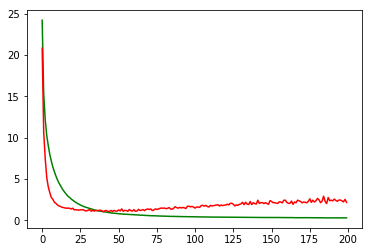

working on d,u and l,learn 0.5 64 0.01 0.0001


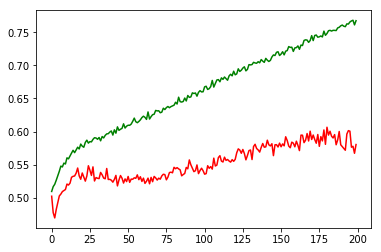

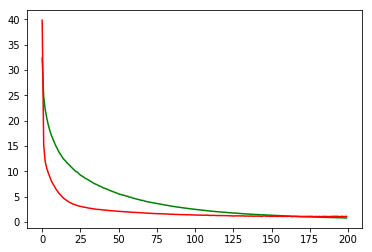

working on d,u and l,learn 0.5 128 0.01 0.001


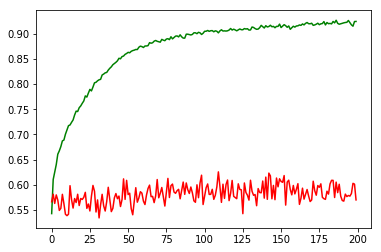

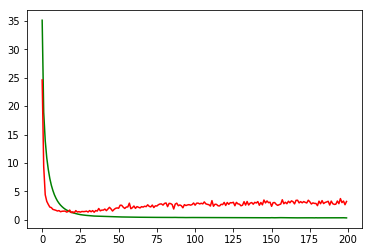

working on d,u and l,learn 0.5 128 0.01 0.0005


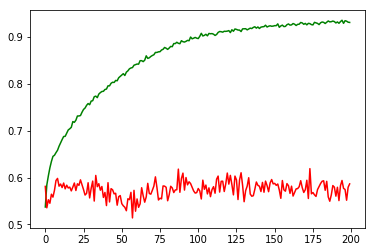

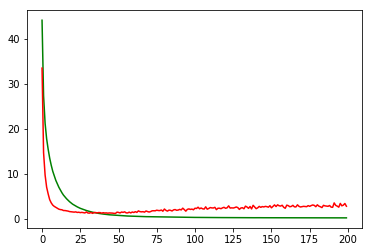

working on d,u and l,learn 0.5 128 0.01 0.0001


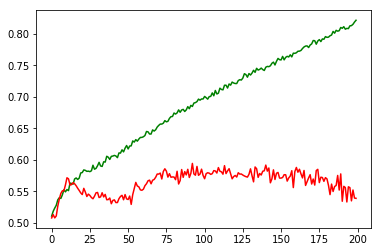

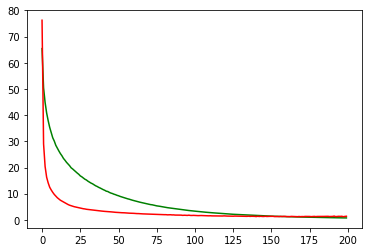

working on d,u and l,learn 0.5 256 0.01 0.001


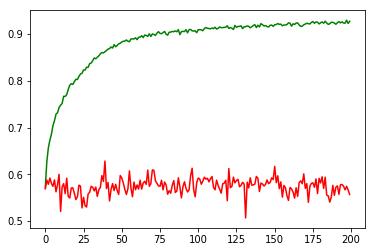

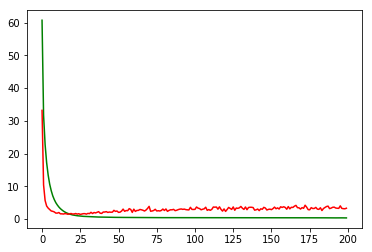

working on d,u and l,learn 0.5 256 0.01 0.0005


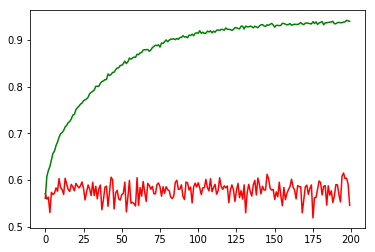

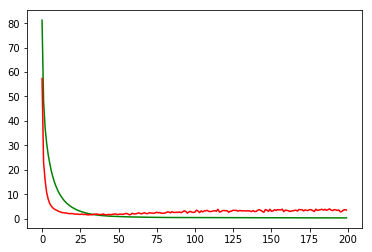

working on d,u and l,learn 0.5 256 0.01 0.0001


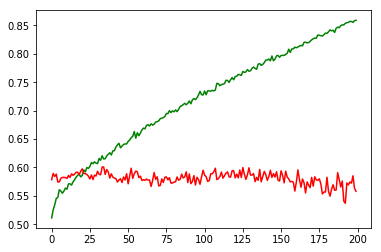

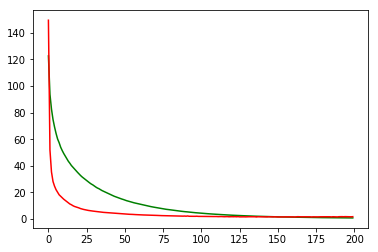

Chart for BEST MODEL FOR : ADBE
l,u,d,le:  0.01 64 0.5 0.001


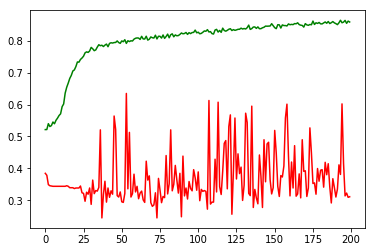

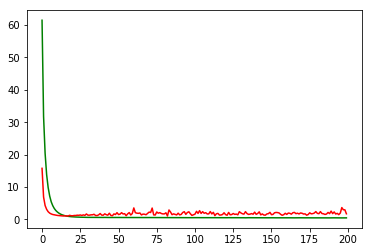

F1,score 0.37156704361873993
G-score: 0.31112265508916553
Accuracy 0.31089459828194316
Window: 140
[[121 267]
 [511 230]]
Vol pos 2.0510067589872603
Vol neg 2.8526101148176206
Real Percentage of gain: -181.75454169849078
Percentage of gain: -1.3281021230501155
Total gain: -1499.4272969235803
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.79859084]
ecco la somma Negativa: [0.23333393]
[[ 95 182]
 [173 111]]
561/561 [==============================] - 0s 225us/step
[1.5153301282787492, 0.36720142618432616]
Percentile:  1
ecco la somma Positiva: [0.74892163]
ecco la somma Negativa: [0.347584]
[[ 17  46]
 [189  72]]
324/324 [==============================] - 0s 231us/step
[1.4648965148278226, 0.27469135802469136]
Percentile:  2
ecco la somma Positiva: [0.79429364]
ecco la somma Negativa: [0.4322644]
[[ 4 21]
 [86 47]]
158/158 [==============================] - 0s 189us/step
[1.6981923878192902, 0.3227848063541364]
Percentile:  3
ecco la somma Nega

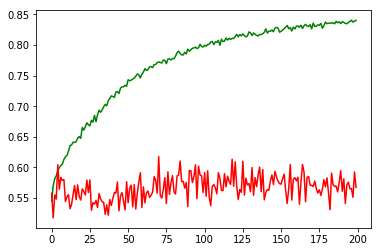

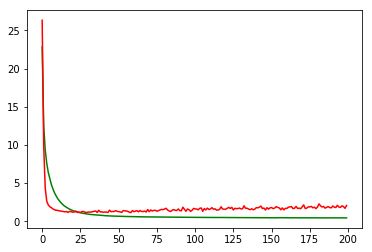

working on d,u and l,learn 0.5 64 0.01 0.0005


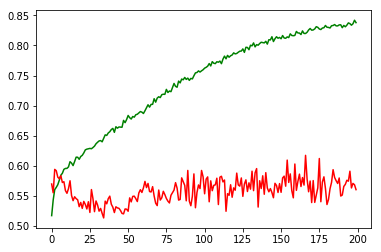

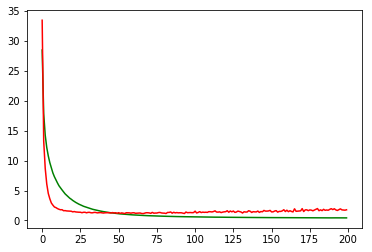

working on d,u and l,learn 0.5 64 0.01 0.0001


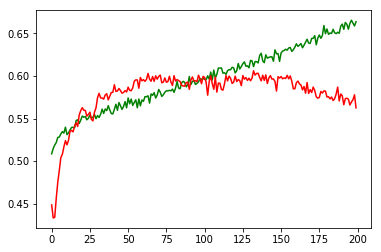

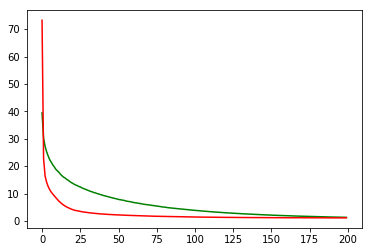

working on d,u and l,learn 0.5 128 0.01 0.001


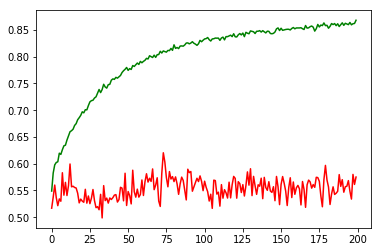

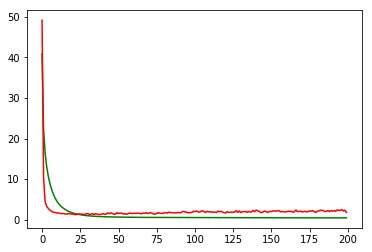

working on d,u and l,learn 0.5 128 0.01 0.0005


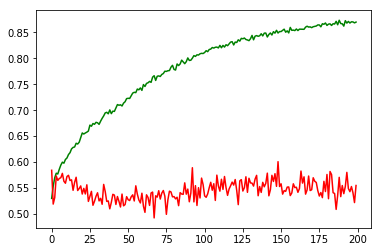

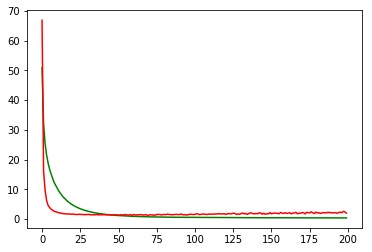

working on d,u and l,learn 0.5 128 0.01 0.0001


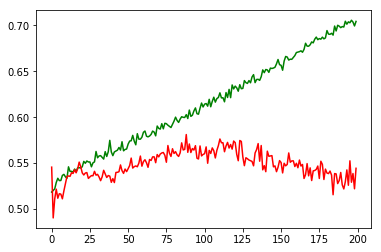

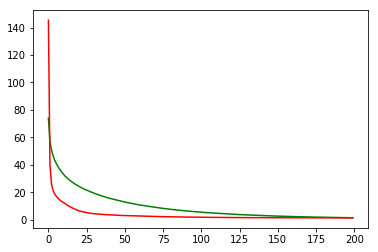

working on d,u and l,learn 0.5 256 0.01 0.001


In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
countpos=np.zeros(5)
countneg=np.zeros(5)
percentilepos=np.zeros(5)
percentileneg=np.zeros(5)
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

       
        lspace=[0.01]
        dropspace=[0.5]
        uspace=[64,128,256]
        learnspace=[0.001,0.0005,0.0001]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        maxd=0
        maxle=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
               
                for l in lspace:
                     for le in learnspace:
                   
                        print('=========================================================')
                        print('working on d,u and l,learn',d,u,l,le)

                        cvacclist=[]
                        #faccio cross validation
                        #start with 40% as train and 10% for validation and then i move in percentege
                        # 0-40 40-50
                        # 0-50 50-60
                        # 0-60 60-70 
                        #etc test set is completely external i do in some way error extimation changin the ticker
                        trainpoint=math.floor(len(x_tv)*0.40)
                        dimval=math.floor(trainpoint*0.25)
                        endval=trainpoint+dimval
                        model=buildModel(l,u,d,le)
                        epoch=200
                        for i in range(0,6):
                            #print('-----')
                            x_train=x_tv[0:trainpoint]
                            y_train=y_tv[0:trainpoint]
                            x_val=x_tv[trainpoint:endval]
                            y_val=y_tv[trainpoint:endval]

                            trainpoint=trainpoint+dimval
                            endval=endval+dimval

                            x_train,y_train=smote(x_train,y_train)
                            if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                                x_val,y_val=smote(x_val,y_val)
                            else:
                                totu=totu+1

                            history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                              shuffle=True)

                            prediction=model.predict(x_val, batch_size=128, verbose=0)
                            for el in range(0,len(prediction)):
                                if(prediction[el]>0.5):
                                    prediction[el]=1
                                else:
                                    prediction[el]=0



                            if(i==0):
                                meanhvl=np.asarray(history.history['val_loss'])
                                meanhva=np.asarray(history.history['val_acc'])
                                meanhl=np.asarray(history.history['loss'])
                                meanha=np.asarray(history.history['acc'])

                            else:
                                meanhvl=np.add(meanhvl,history.history['val_loss'])
                                meanhva=np.add(meanhva,history.history['val_acc'])
                                meanha=np.add(meanha,history.history['acc'])
                                meanhl=np.add(meanhl,history.history['loss'])
                            #i take the last one
                            #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            #USING G SCORE AS MODEL SELECTION METRIC
                            maxAcc=geometric_mean_score(y_val, prediction)
                            cvacclist.append(maxAcc)
                            

                        cvacc=sum(cvacclist)/len(cvacclist)
                        if(cvacc>maxacc):
                            maxacc=cvacc
                            maxu=u
                            maxl=l
                            maxle=le
                            maxd=d

                        meanhvl=meanhvl/6
                        meanhva=meanhva/6
                        meanhl=meanhl/6
                        meanha=meanha/6

                        plt.plot(meanha,'g')
                        plt.plot(meanhva,'r')
                        plt.show()
                        plt.plot(meanhl,'g')
                        plt.plot(meanhvl,'r')
                        plt.show()  

                    
                    
        model=buildModel(maxl,maxu,maxd,maxle)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs = 200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('Chart for BEST MODEL FOR :',files[o-1])
        print('l,u,d,le: ',maxl,maxu,maxd,maxle)
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            cp=[]
        
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                res=[]
                
                
                
                
                
                for pred in range(0,len(predictionp)):
                    res.append(predictionp[pred]+y_test[distribution[g]][pred])
               
                res=np.array(res)
                truenegative=np.argwhere(res<0.5 )
                truepositive=np.argwhere(res>=1.5 )
                if(len(truepositive[:,0])>0):
                   
                    
                    tpos=sum(predictionp[truepositive[:,0]])/len(truepositive[:,0])
                    print('ecco la somma Positiva:',tpos)
                    percentilepos[g]=+tpos
                    countpos[g]=+1
                if(len(truenegative[:,0])>0):
                    tneg=sum(predictionp[truenegative[:,0]])/len(truenegative[:,0])
                   
                    
                    print('ecco la somma Negativa:',tneg)
                    percentileneg[g]=+tneg
                    countneg[g]=+1
                
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                        
                    else:
                        predictionp[el]=0 
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(model.evaluate(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
            chartscore.append(tempscore[1])    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))

#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

            

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()

In [ ]:
for percentile in range(0,5):
    print('Percentile :',percentile)
    print(sum(percentilepos[percentile])/countpos[percentile])
    print(sum(percentileneg[percentile])/countneg[percentile])

In [ ]:
print(np.argwhere(res==1))

In [ ]:
print(res)

In [ ]:
print(len(res))

In [ ]:
print(len(res[len(res)-1]))

In [ ]:
print(truepositive[:,0])